# **Previsão FBHP**<br>
UFJF - PGMC - Abril/2023
Prof. Dr. Leonardo Golliat<br>

## Versionamento

*   v0: 24/04/2023: Vagner: Criação da estrutura do notebook

#**1. Definição do Problema**

**Formato**<br>
Dados tratados resultantes de ETL

**Tipo de dado**<br>
CSV

Nomes das colunas

1. **SN**: Número de série
2. **WHP**: Pressão na cabeça do poço (Wellhead Pressure) xxx
3. **WFR**: Taxa de fluxo de água (Water Flow Rate)
4. **OFR**: Taxa de fluxo de óleo (Oil Flow Rate)
5. **GFR**: Taxa de fluxo de gás (Gas Flow Rate)
6. **WPD**: Produção diária de água (Water Production Daily)
7. **API**: Índice de gravidade específica do petróleo (Oil API (American Petroleum Institute) gravity)
8. **ID**: Diâmetro interno do tubo (Inner Diameter)
9. **WBHT**: Temperatura no fundo do poço (Bottomhole Temperature)
11. **<font color="red">BHP</font>**: Pressão de fundo de poço em escoamento (Flowing Bottomhole Pressure)

#**2. Importação de bibliotecas ***

In [1]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [2]:
#Importação de bibliotecas
import pylab as pl
import pandas as pd
import numpy as np
pl.style.use('ggplot')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
! pip install sweetviz

In [4]:
import sweetviz as sv
sv.feature_config.FeatureConfig(force_num='2')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
pip install gmdh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.3/875.3 kB 5.3 MB/s eta 0:00:00


In [8]:
import gmdh

In [9]:
from gmdh import Combi, Multi, Mia, Ria, split_data
#COMBI, MULTI, MIA, RIA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
import json
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**3. Aquisição e limpeza dos dados ***

## Aquisição

In [12]:
#Montando drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [13]:
#Trocando de diretório
#os.chdir("/content/drive/My Drive/Colab Notebooks")
#os.chdir("/content/drive/My Drive")
os.chdir("/content/drive/MyDrive/Colab Notebooks/Mestrado/Dissertacao")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#df = pd.read_csv('Ayoub_v2.csv')
df = pd.read_csv('Shammari.csv',sep=';')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [15]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(795, 10)

 ## Limpeza

Não houve necessidade de limpeza e/ou transformação.
Também não há linhas com valores nulos.

In [ ]:
#Verificando valores nulos
df.isnull().sum()

SN      0
WHP     0
WFR     0
OFR     0
GFR     0
WPD     0
API     0
ID      0
WBHT    0
BHP     0
dtype: int64

#**4. Análise Exploratória dos Dados**

###Visualização

In [ ]:
# Estatísticas básicas
summary_statistics = df.describe()

# Exibindo as estatísticas
print("Estatísticas básicas para cada coluna:")
print(summary_statistics)

Estatísticas básicas para cada coluna:
               SN           WHP           WFR           OFR           GFR  \
count  795.000000  7.950000e+02  7.950000e+02  7.950000e+02  7.950000e+02   
mean   398.000000 -1.340647e-17  4.915704e-17 -6.926674e-17 -3.798499e-17   
std    229.641024  1.000630e+00  1.000630e+00  1.000630e+00  1.000630e+00   
min      1.000000 -1.308500e+00 -9.658918e-01 -1.410464e+00 -1.135604e+00   
25%    199.500000 -7.248675e-01 -8.161113e-01 -7.865033e-01 -7.799560e-01   
50%    398.000000 -4.093907e-01 -3.118284e-01 -2.189978e-01 -2.411018e-01   
75%    596.500000  4.581705e-01  5.088032e-01  5.335990e-01  4.503539e-01   
max    795.000000  4.441065e+00  4.002810e+00  3.290611e+00  6.399490e+00   

                WPD           API            ID          WBHT          BHP  
count  7.950000e+02  7.950000e+02  7.950000e+02  7.950000e+02   795.000000  
mean   1.243450e-15  1.282552e-15 -1.273614e-16 -4.066628e-16  2469.730818  
std    1.000630e+00  1.000630e+00  1

Indicativo de necessidade de escalonamento (feature scaling)

In [ ]:
#Visualizando as colunas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SN      795 non-null    int64  
 1   WHP     795 non-null    int64  
 2   WFR     795 non-null    int64  
 3   OFR     795 non-null    int64  
 4   GFR     795 non-null    float64
 5   WPD     795 non-null    float64
 6   API     795 non-null    float64
 7   ID      795 non-null    float64
 8   WBHT    795 non-null    int64  
 9   BHP     795 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 62.2 KB


In [ ]:
#Tabela de freqüência da variável alvo
df['BHP'].value_counts()

BHP
2224    4
2580    4
2533    4
2379    4
2349    4
       ..
3358    1
2136    1
2497    1
2141    1
2179    1
Name: count, Length: 596, dtype: int64

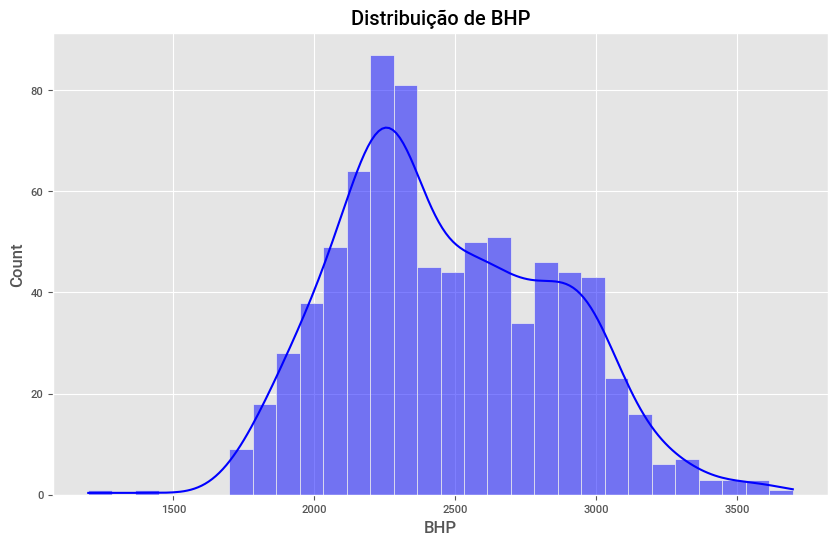

In [ ]:
# Visualizar a distribuição da coluna alvo "BHP"
plt.figure(figsize=(10, 6))
sns.histplot(df['BHP'], kde=True, bins=30, color='blue')
plt.title('Distribuição de BHP')
plt.xlabel('BHP')
plt.show()

In [ ]:
df.head()

,SN,WHP,WFR,OFR,GFR,WPD,API,ID,WBHT,BHP
0,1,670,3822,1848,248.0,6858.0,33.4,4.000,217,3234
1,2,600,2420,824,1078.0,6567.0,31.7,3.958,200,2649
2,3,340,140,5469,2620.0,6252.0,33.4,4.000,217,1851
3,4,280,2245,6455,3118.0,6164.0,33.4,3.958,217,1975
4,5,380,2758,3642,1344.0,6486.0,33.4,3.958,217,2383


In [ ]:
sv_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


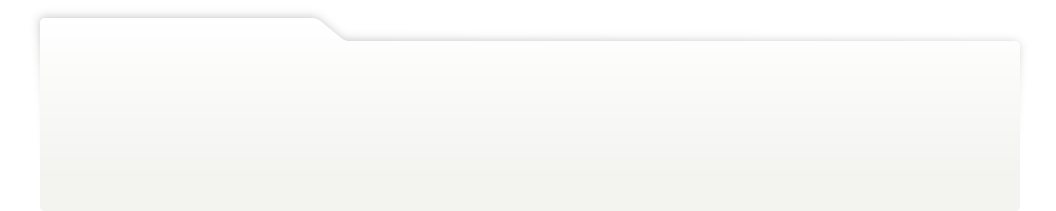
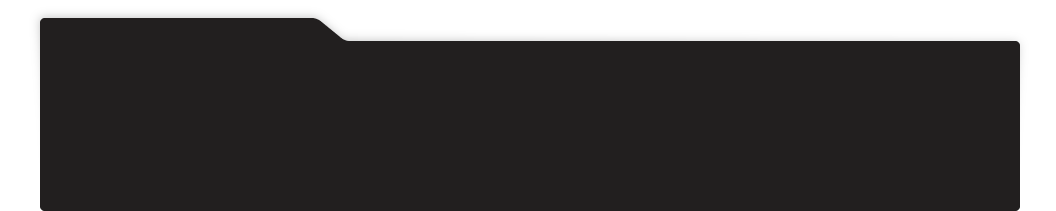
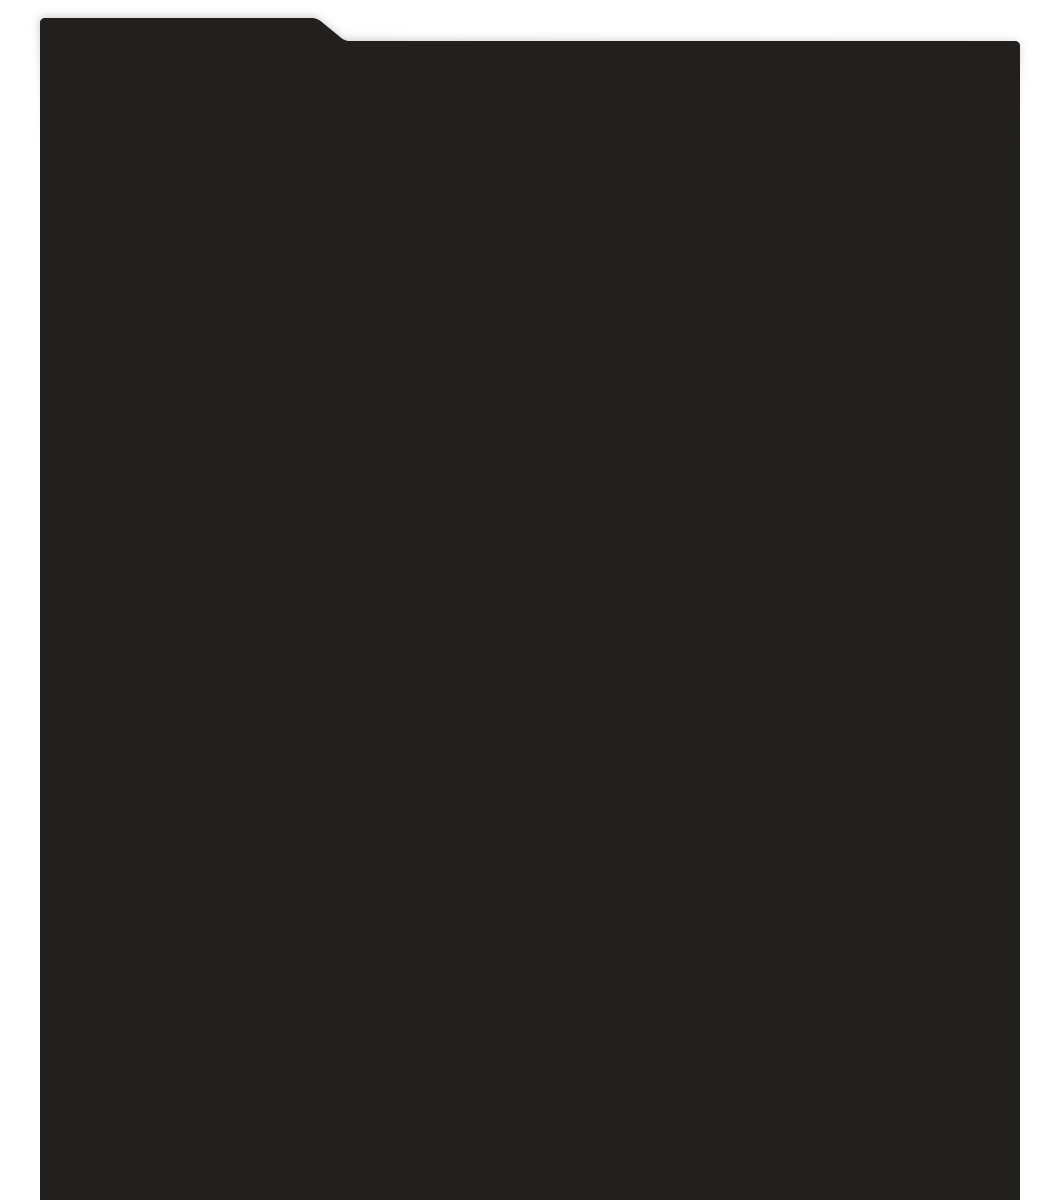
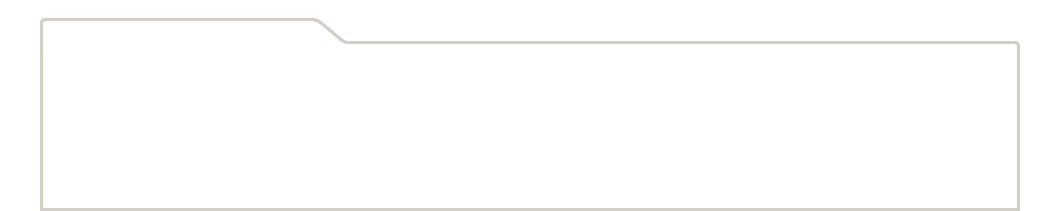
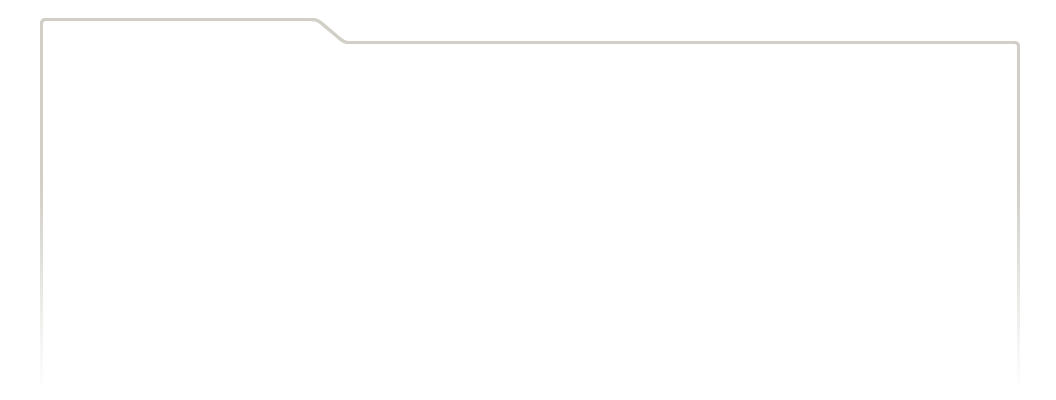
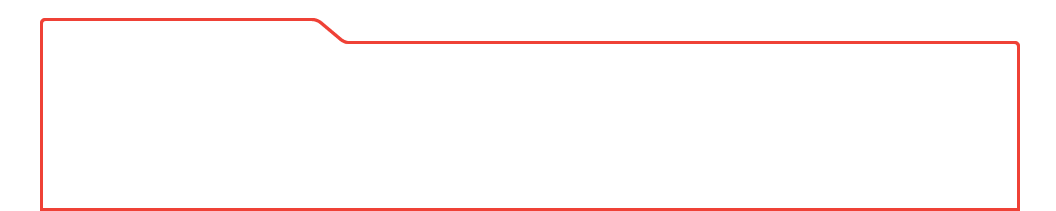
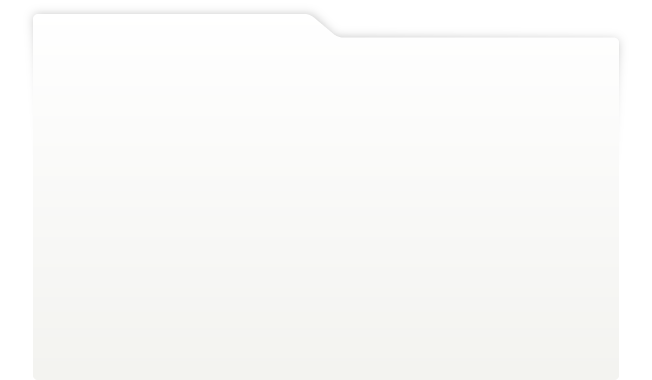
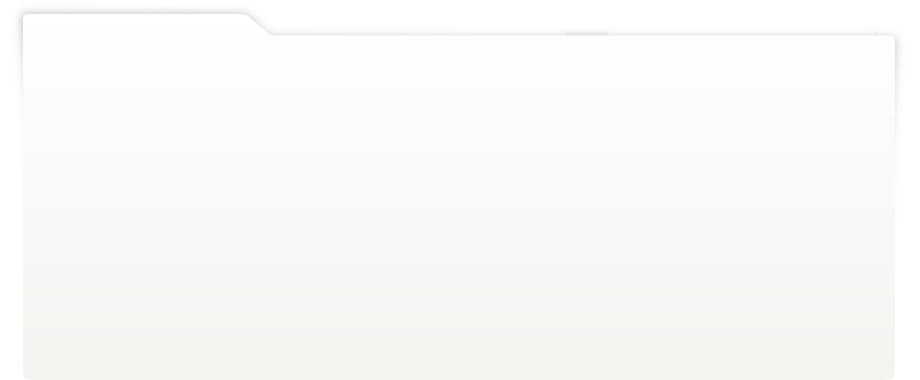
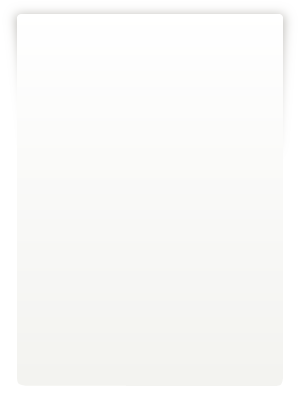
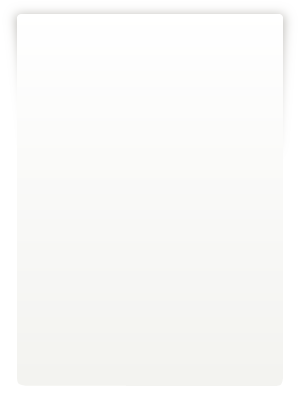
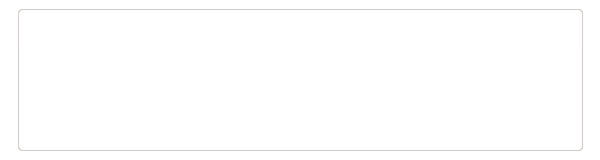
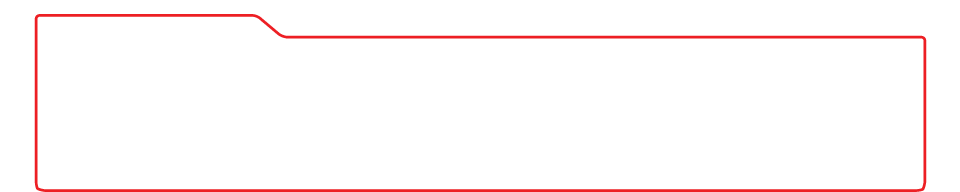
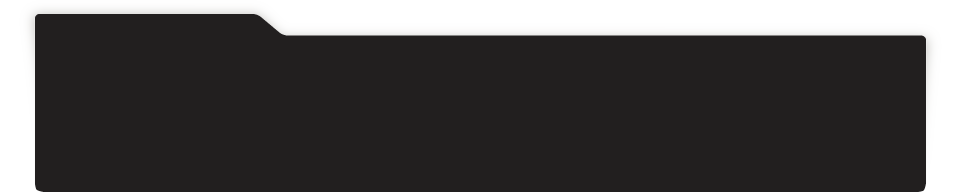
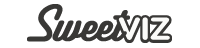
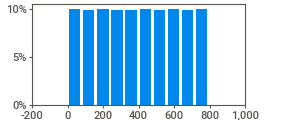
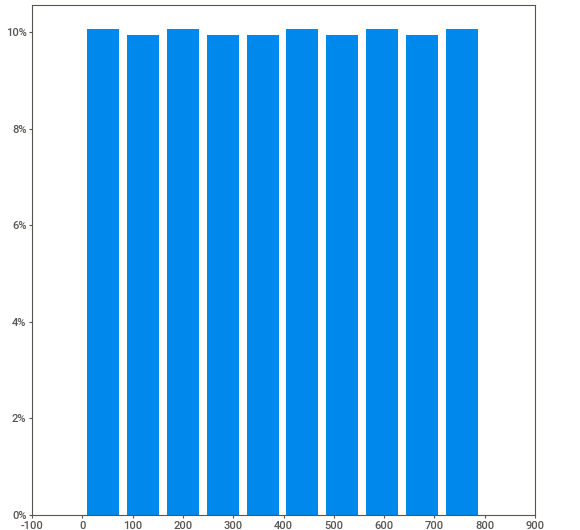
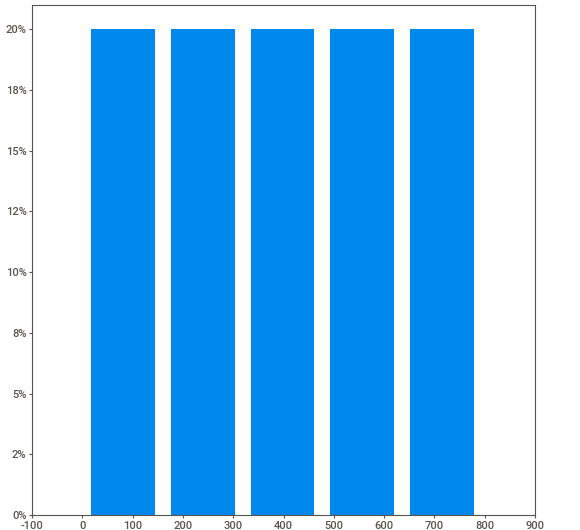
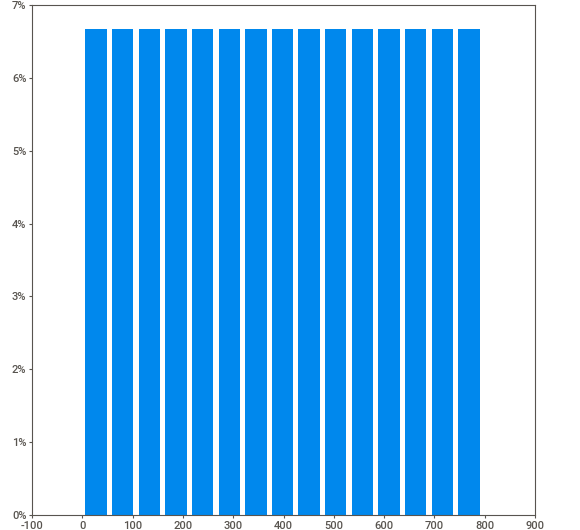
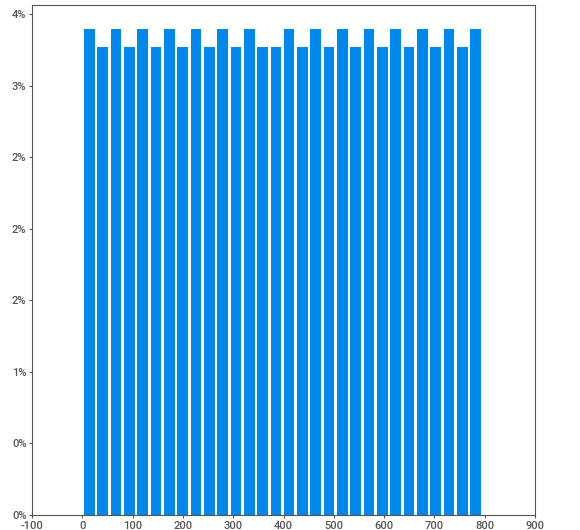
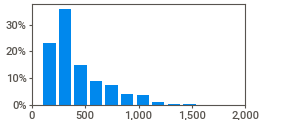
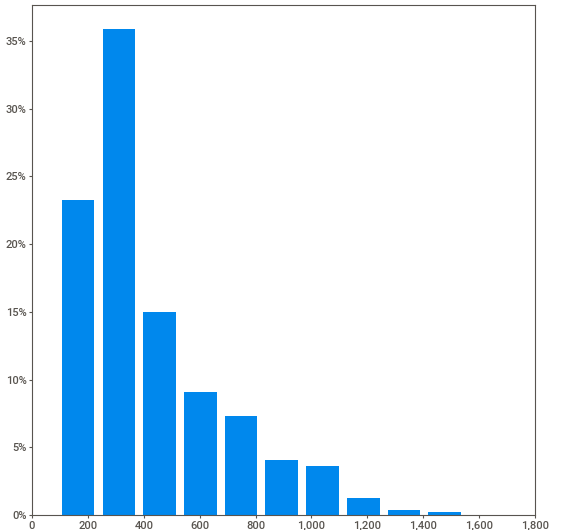
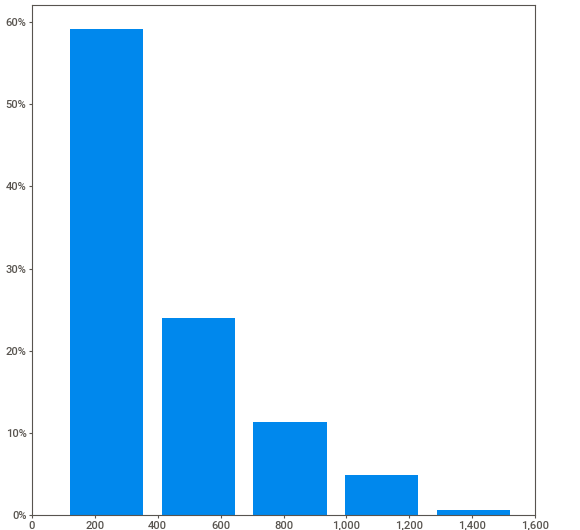
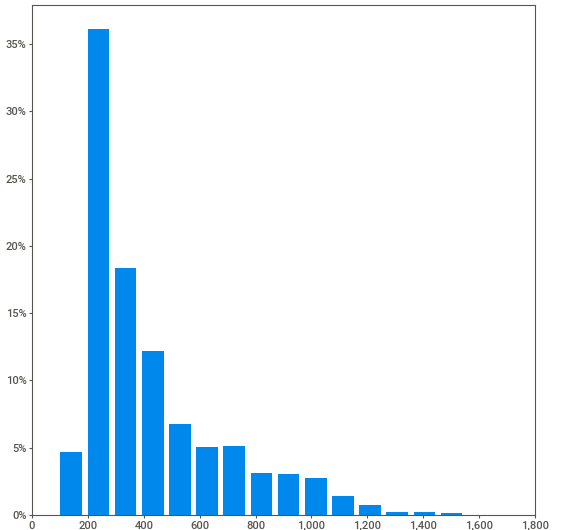
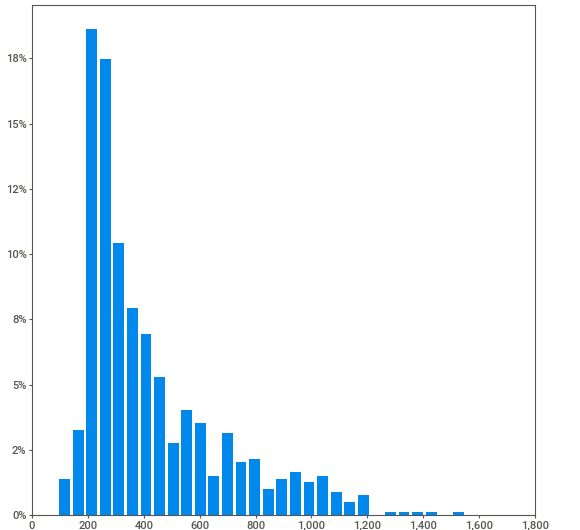
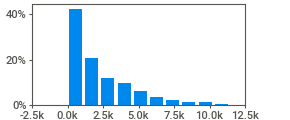
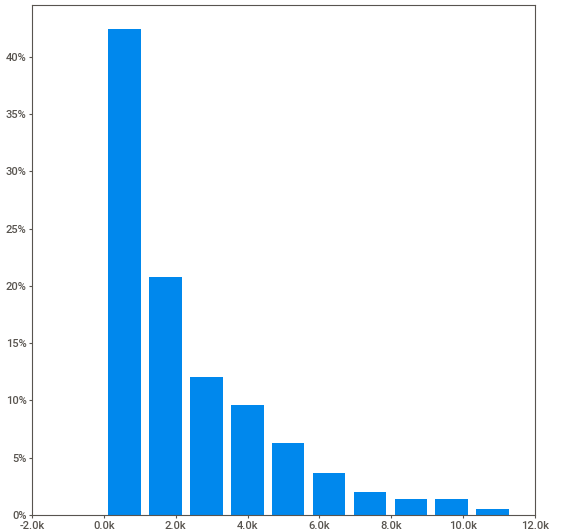
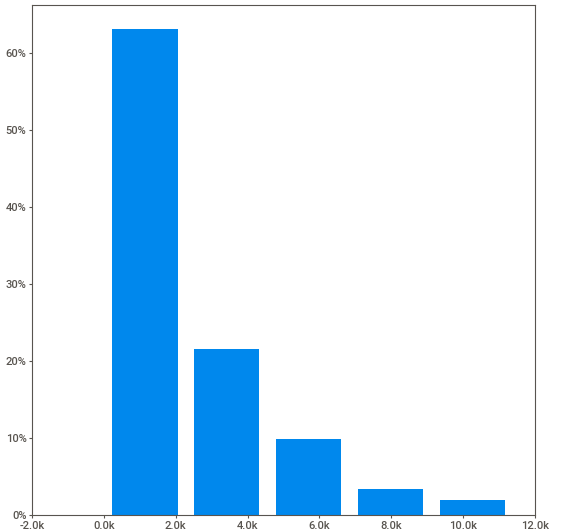
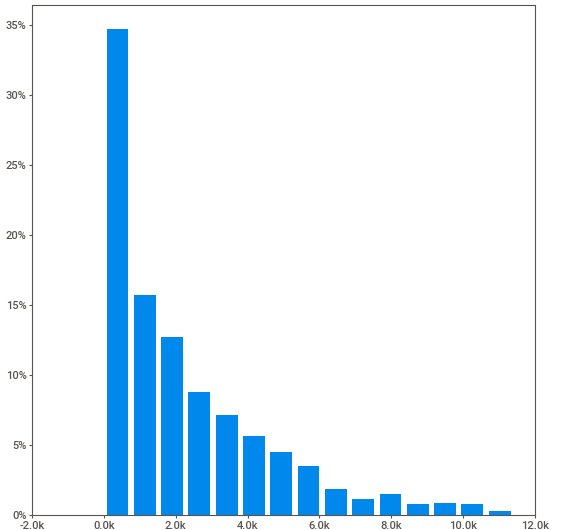
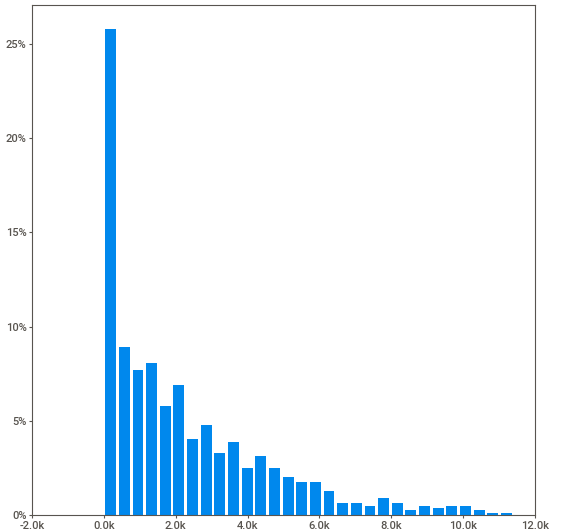
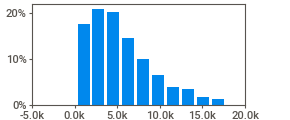
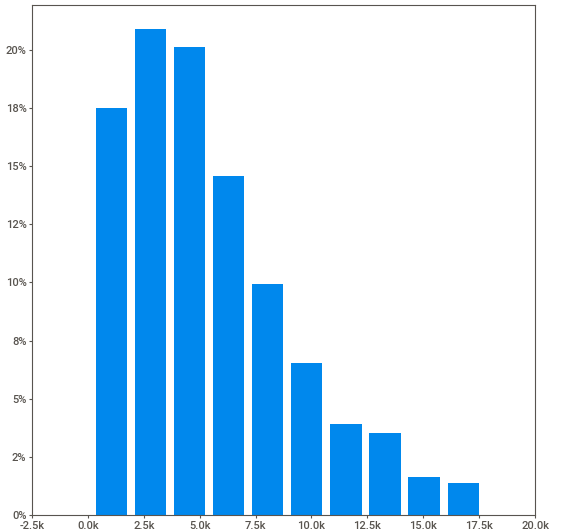
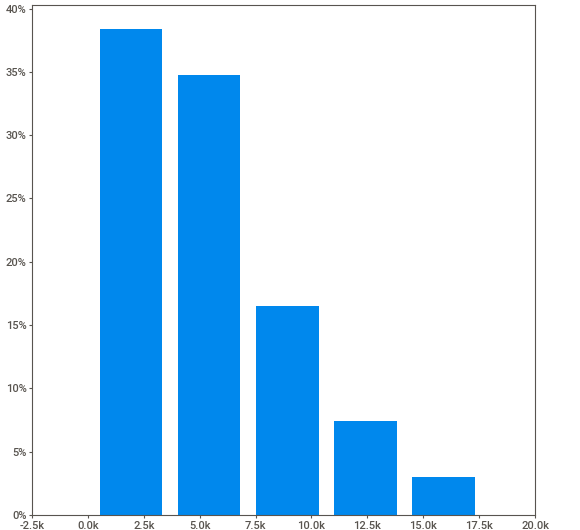
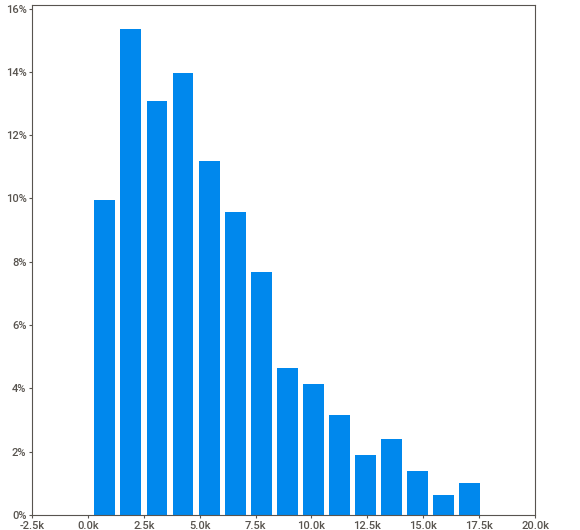
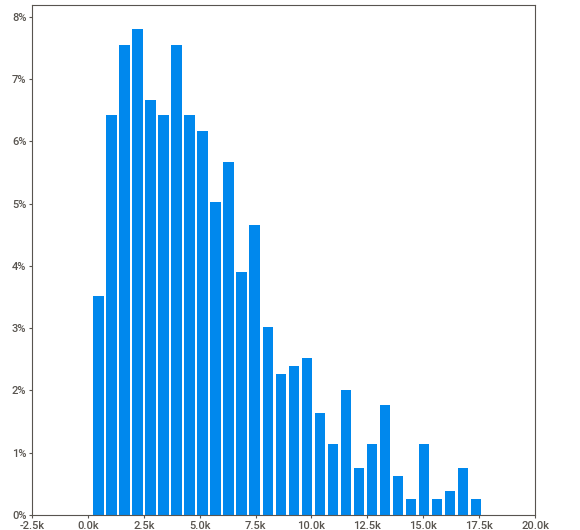
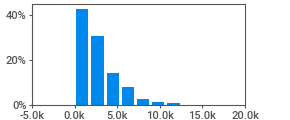
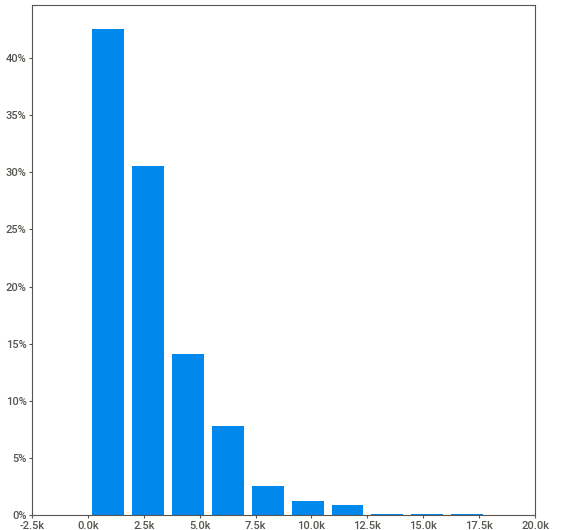
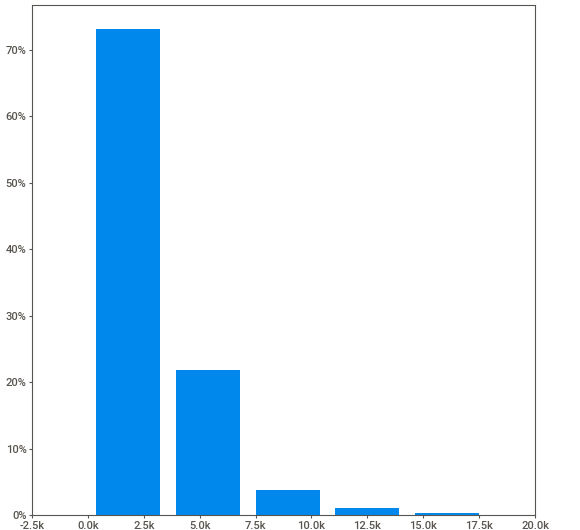
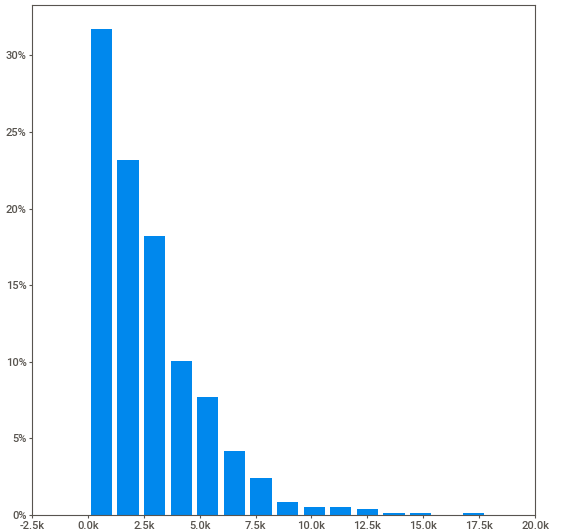
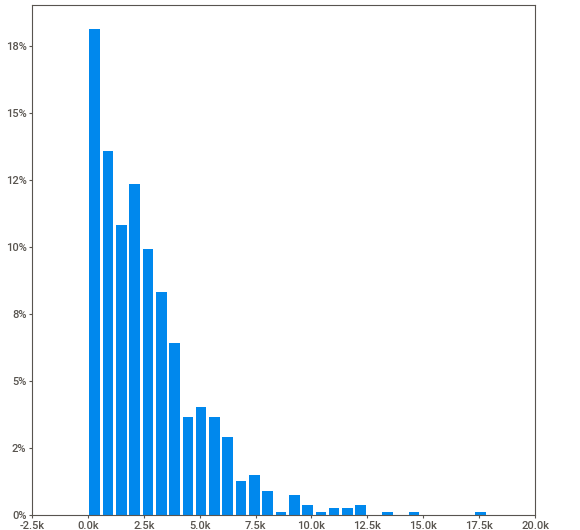
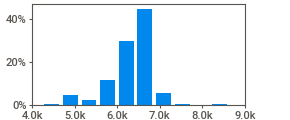
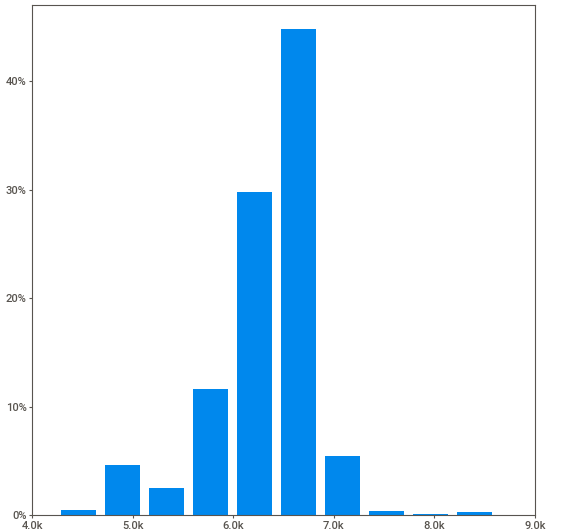
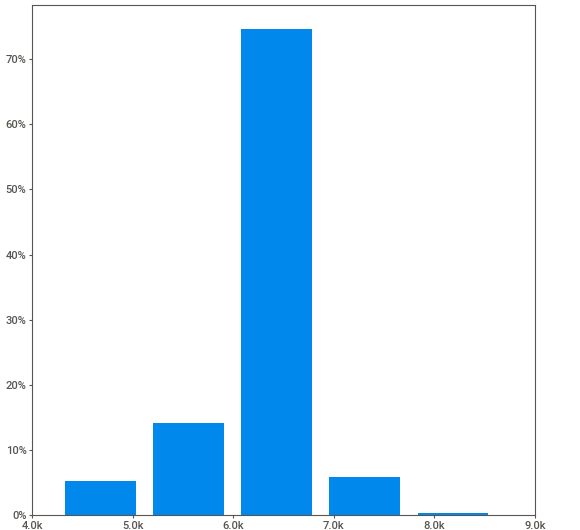
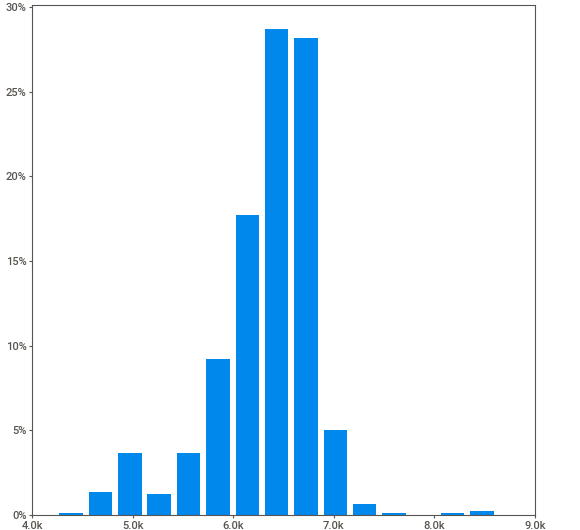
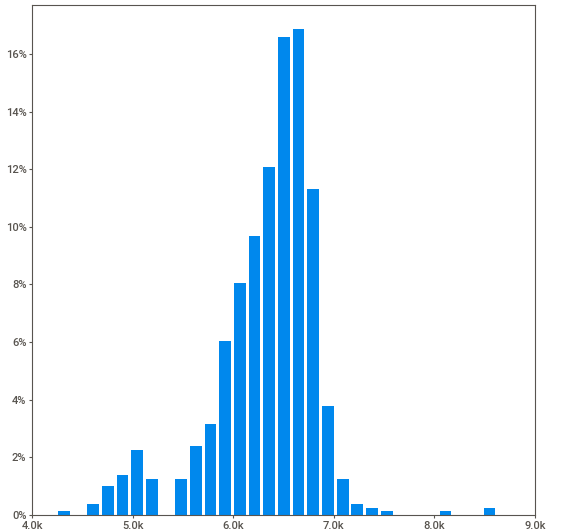
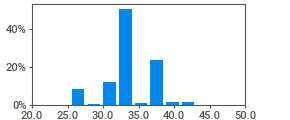
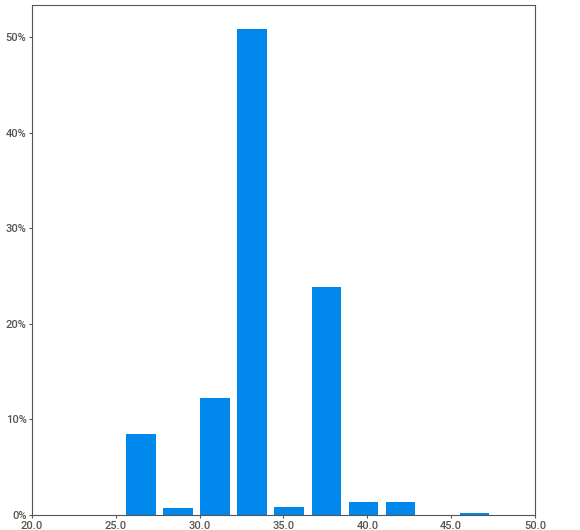
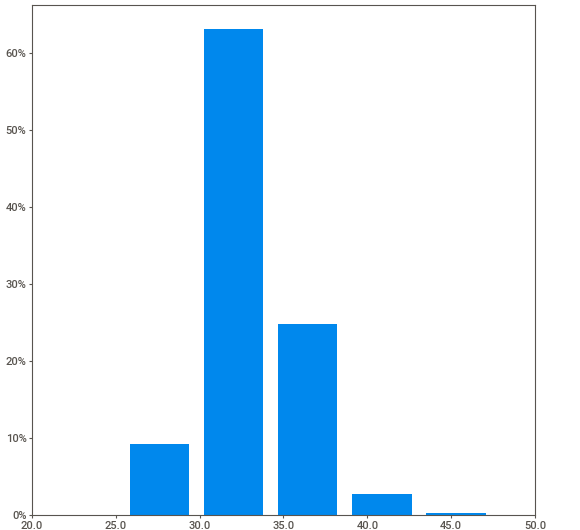
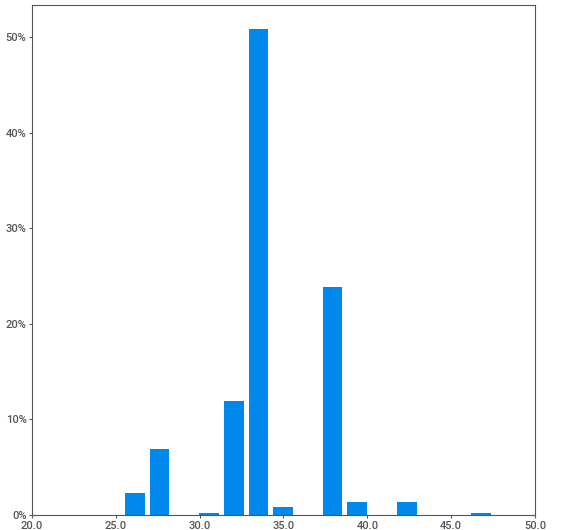
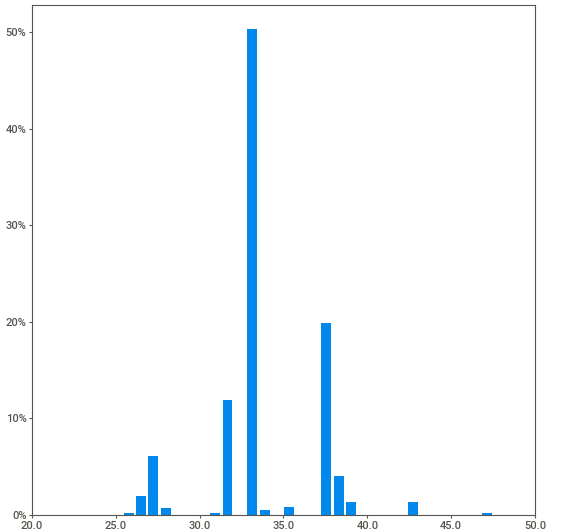
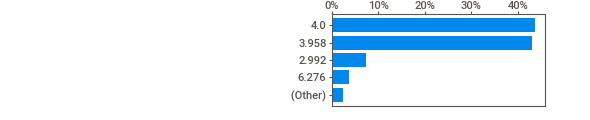
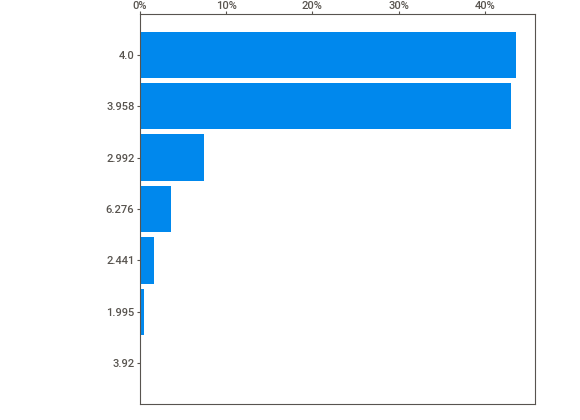
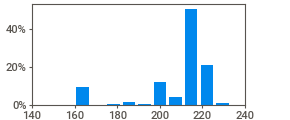
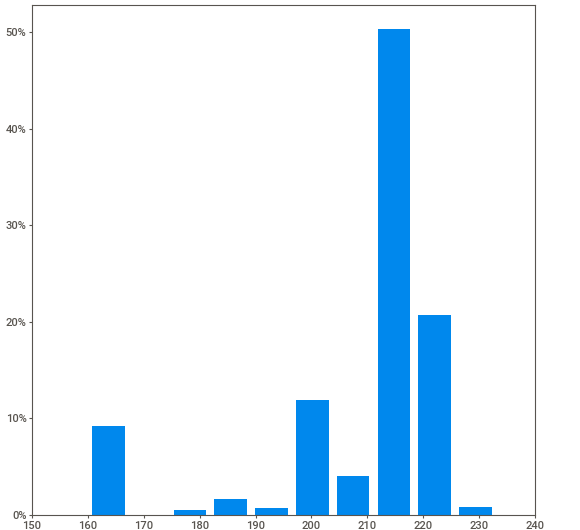
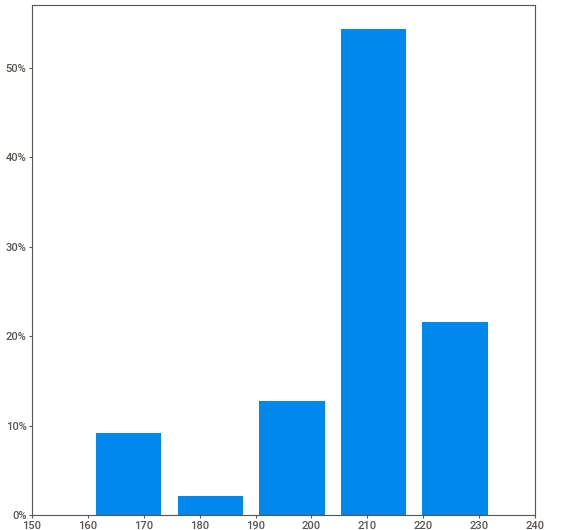
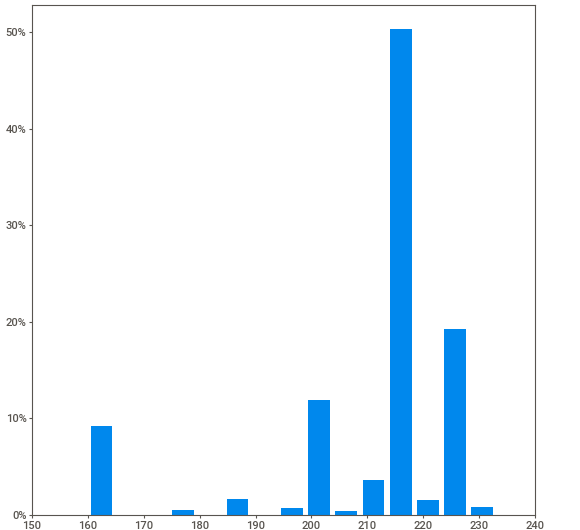
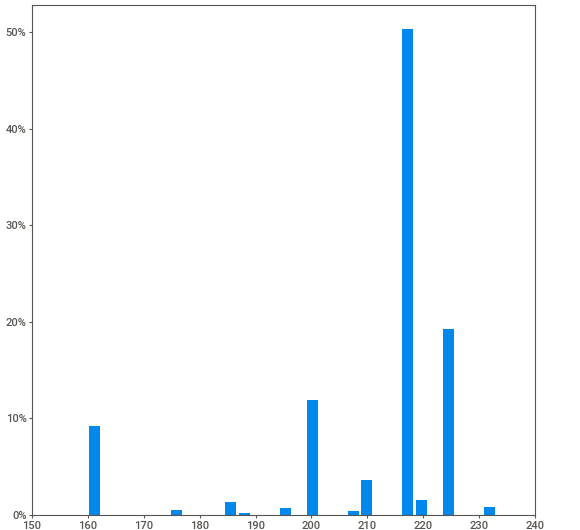
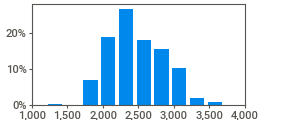
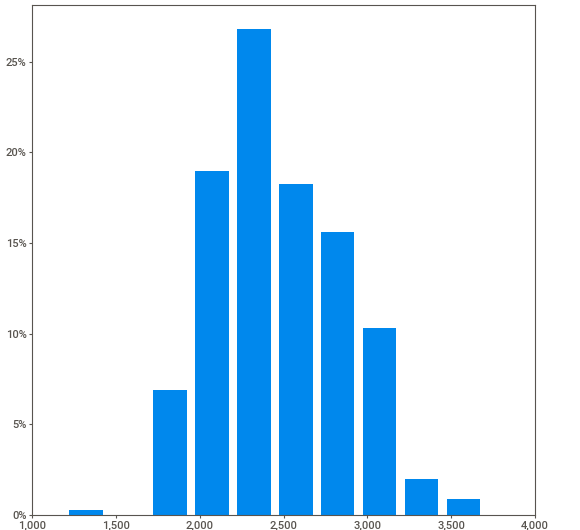
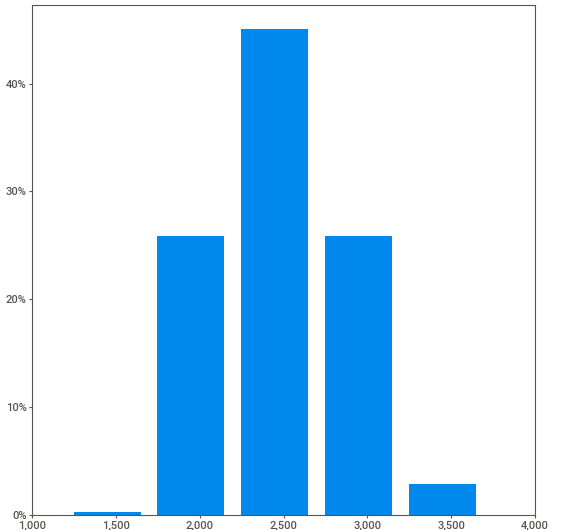
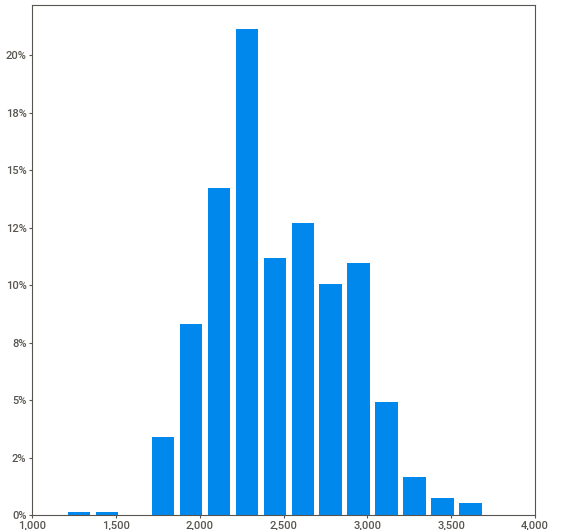
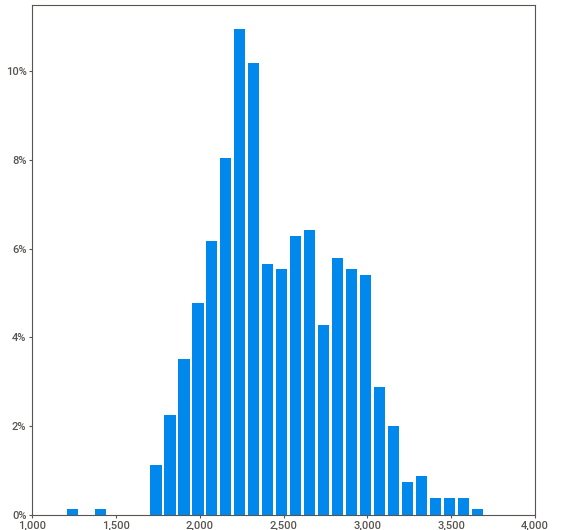
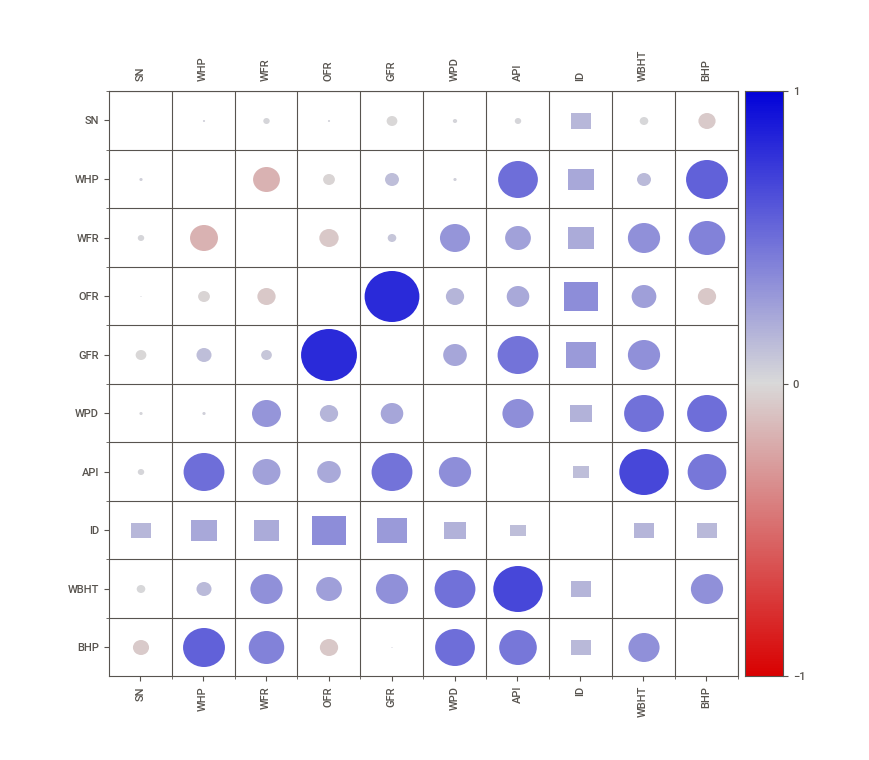
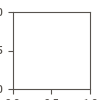

In [ ]:
sv_report.show_notebook()

###Análise de correlações

**Análise principal de correlação**</br>

Matriz de correlação entre todos os atributos numéricos, exceto o FBHP. Utilizando a biblioteca pandas para calcular a matriz de correlação e a seaborn para criar um mapa de calor para uma visualização mais clara.

In [ ]:
df.corr()

,SN,WHP,WFR,OFR,GFR,WPD,API,ID,WBHT,BHP
SN,1.000000,0.001540,-0.029911,-0.012294,-0.058311,-0.022712,-0.034200,0.001425,-0.036392,-0.119465
WHP,0.001540,1.000000,-0.226932,-0.072420,0.081607,-0.002123,0.464064,0.012186,0.096391,0.531444
WFR,-0.029911,-0.226932,1.000000,-0.126565,0.044727,0.275480,0.221848,0.104999,0.302687,0.369929
OFR,-0.012294,-0.072420,-0.126565,1.000000,0.803311,0.126699,0.183002,0.292430,0.225979,-0.124245
GFR,-0.058311,0.081607,0.044727,0.803311,1.000000,0.194031,0.446424,0.222163,0.304022,0.007120
WPD,-0.022712,-0.002123,0.275480,0.126699,0.194031,1.000000,0.312708,0.010003,0.450735,0.467451
API,-0.034200,0.464064,0.221848,0.183002,0.446424,0.312708,1.000000,0.017786,0.660099,0.422137
ID,0.001425,0.012186,0.104999,0.292430,0.222163,0.010003,0.017786,1.000000,0.035718,-0.091187
WBHT,-0.036392,0.096391,0.302687,0.225979,0.304022,0.450735,0.660099,0.035718,1.000000,0.303624
BHP,-0.119465,0.531444,0.369929,-0.124245,0.007120,0.467451,0.422137,-0.091187,0.303624,1.000000


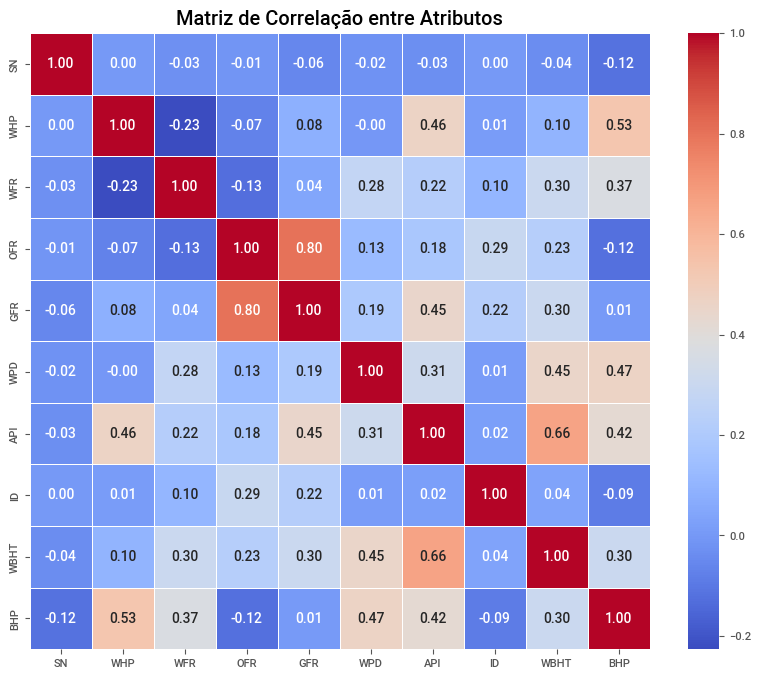

In [ ]:
# Excluindo a coluna FBHP
#numeric_columns_except_fbhp = ['WHP', 'WFR', 'OFR', 'GFR', 'WPD', 'API', 'ID', 'BHT', 'WHT']

# Calculando a matriz de correlação
#correlation_matrix = df[numeric_columns_except_fbhp].corr()
correlation_matrix = df.corr()

# Criando um mapa de calor para visualização
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Atributos')
plt.show()

In [ ]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Encontra pares de colunas com correlação maior do que 0.7
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Exibe os pares de colunas com correlação maior do que 0.7
if len(highly_correlated_pairs) > 0:
    print("Pares de colunas com correlação maior do que 0.7:")
    for pair in highly_correlated_pairs:
        print(pair)
else:
    print("Não há pares de colunas com correlação maior do que 0.7.")

Pares de colunas com correlação maior do que 0.7:
('GFR', 'OFR')


Fluxo de gás e fluxo de óleo com alta correção

##Outliers

Coluna: SN
Total de outliers: 0
Porcentagem de outliers: 0.00%
Limite inferior para outliers: nan
Limite superior para outliers: nan


Coluna: WHP
Total de outliers: 40
Porcentagem de outliers: 5.03%
Limite inferior para outliers: 998.00
Limite superior para outliers: 1550.00


Coluna: WFR
Total de outliers: 26
Porcentagem de outliers: 3.27%
Limite inferior para outliers: 8026.00
Limite superior para outliers: 11395.00


Coluna: OFR
Total de outliers: 22
Porcentagem de outliers: 2.77%
Limite inferior para outliers: 14790.00
Limite superior para outliers: 17663.00


Coluna: GFR
Total de outliers: 23
Porcentagem de outliers: 2.89%
Limite inferior para outliers: 8143.00
Limite superior para outliers: 17859.00


Coluna: WPD
Total de outliers: 55
Porcentagem de outliers: 6.92%
Limite inferior para outliers: 4243.00
Limite superior para outliers: 8620.00


Coluna: API
Total de outliers: 20
Porcentagem de outliers: 2.52%
Limite inferior para outliers: 25.40
Limite superior para outliers: 47.5

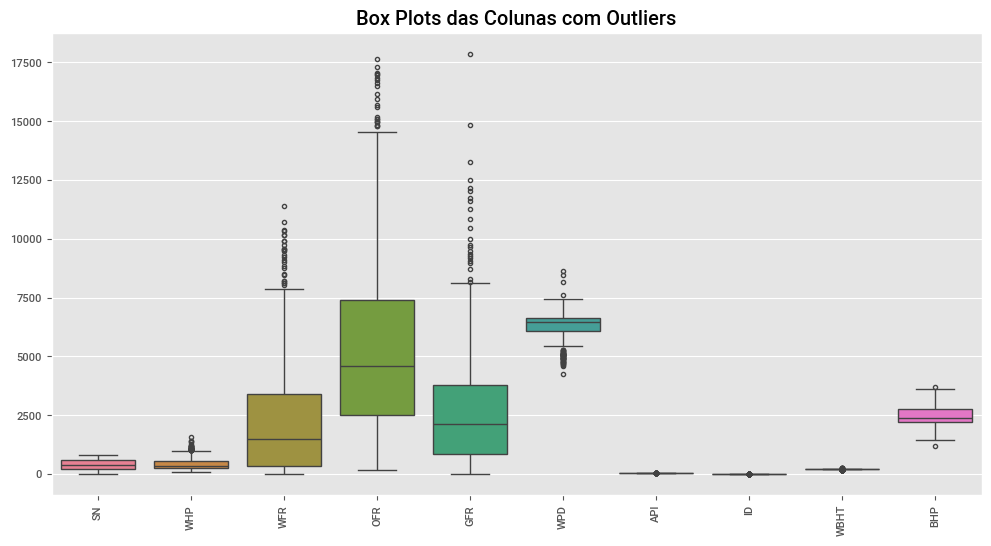

In [ ]:
# Seleciona apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Define o limite para identificar outliers (por exemplo, usando o método IQR)
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Analisa cada coluna para identificar outliers
outliers_info = {}
for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outliers_info[col] = {
        'total_outliers': outliers.sum(),
        'outliers_percent': (outliers.sum() / len(df)) * 100,
        'lower_bound': numeric_columns[col][outliers].min(),
        'upper_bound': numeric_columns[col][outliers].max()
    }

# Exibe o resultado da análise de outliers para cada coluna
for col, info in outliers_info.items():
    print(f"Coluna: {col}")
    print(f"Total de outliers: {info['total_outliers']}")
    print(f"Porcentagem de outliers: {info['outliers_percent']:.2f}%")
    print(f"Limite inferior para outliers: {info['lower_bound']:.2f}")
    print(f"Limite superior para outliers: {info['upper_bound']:.2f}")
    print("\n")

# Plota box plots para visualizar outliers (opcional)
plt.figure(figsize=(12, 6))
plt.title("Box Plots das Colunas com Outliers")
sns.boxplot(data=numeric_columns[outliers_info.keys()])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SN      795 non-null    int64  
 1   WHP     795 non-null    int64  
 2   WFR     795 non-null    int64  
 3   OFR     795 non-null    int64  
 4   GFR     795 non-null    float64
 5   WPD     795 non-null    float64
 6   API     795 non-null    float64
 7   ID      795 non-null    float64
 8   WBHT    795 non-null    int64  
 9   BHP     795 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 62.2 KB


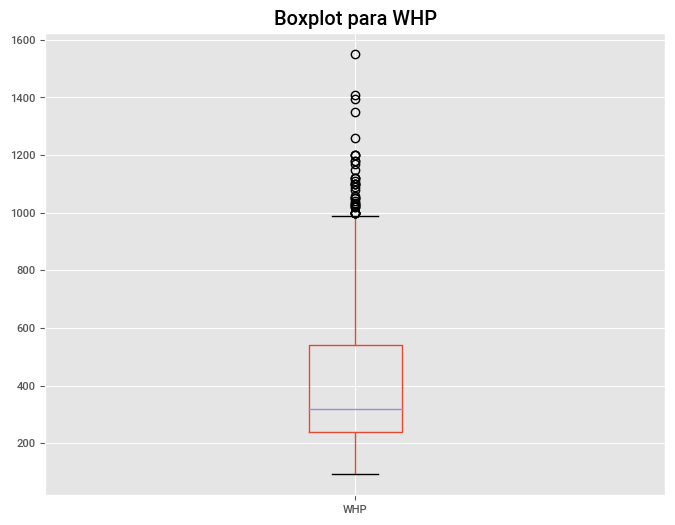


Análise de outliers para a coluna WHP:
 - Número de outliers: 40
 - Limite inferior: -210.0
 - Limite superior: 990.0
 - Valores outliers: [1200, 1000, 1000, 1120, 1120, 1260, 1080, 1050, 1040, 1030, 1000, 1050, 1120, 1170, 998, 1550, 1020, 1033, 1100, 1028, 1000, 1025, 1050, 1058, 1100, 1110, 1020, 1394, 1200, 1410, 1000, 1090, 1180, 1180, 1149, 1100, 1030, 1200, 1350, 1100]


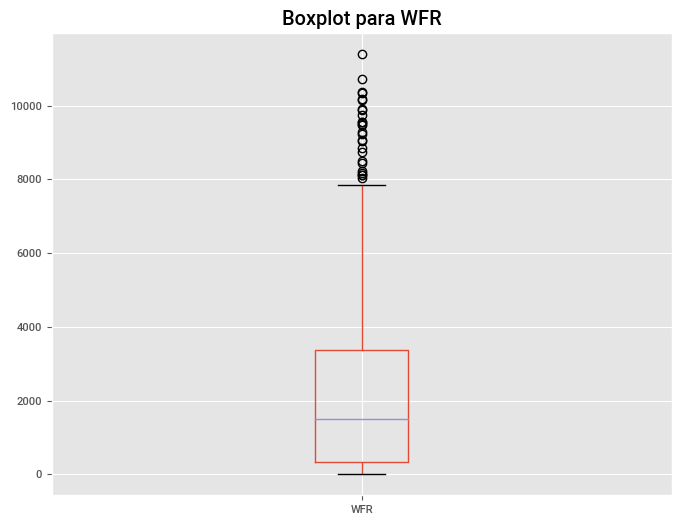


Análise de outliers para a coluna WFR:
 - Número de outliers: 26
 - Limite inferior: -4214.25
 - Limite superior: 7939.75
 - Valores outliers: [9481, 10335, 10380, 9901, 8223, 9077, 8451, 9298, 8124, 8187, 9222, 9563, 11395, 10715, 8755, 8026, 9896, 9031, 10144, 9570, 8507, 9735, 8861, 10171, 9500, 8116]


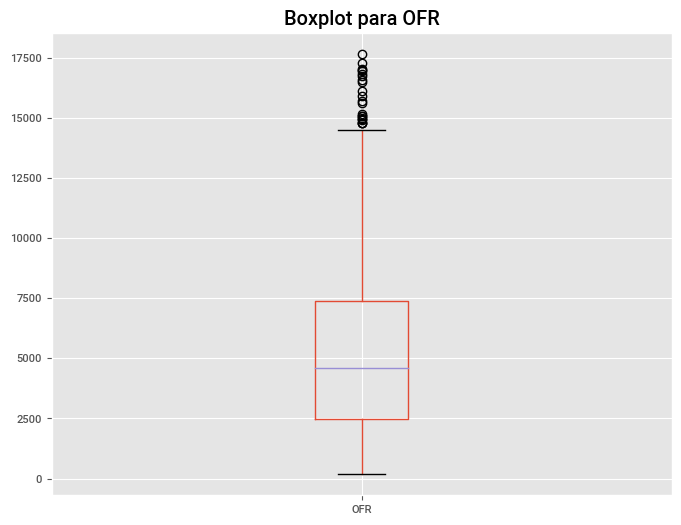


Análise de outliers para a coluna OFR:
 - Número de outliers: 22
 - Limite inferior: -4868.75
 - Limite superior: 14773.25
 - Valores outliers: [14790, 15094, 16971, 15170, 15698, 16601, 16133, 16994, 16848, 15941, 16739, 15080, 16488, 14944, 15620, 17663, 17284, 14791, 17040, 14815, 14962, 15004]


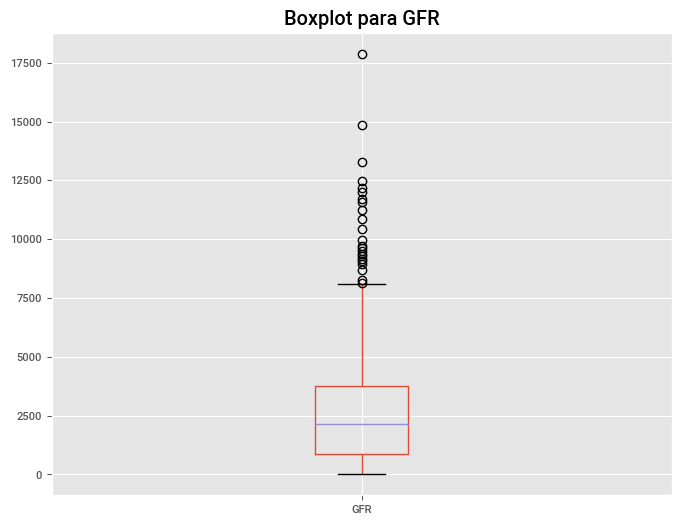


Análise de outliers para a coluna GFR:
 - Número de outliers: 23
 - Limite inferior: -3520.25
 - Limite superior: 8137.75
 - Valores outliers: [10454.0, 11711.0, 9727.0, 9977.0, 13261.0, 11250.0, 9353.0, 9639.0, 17859.0, 9283.0, 12163.0, 10840.0, 8143.0, 9170.0, 8706.0, 9056.0, 12481.0, 11587.0, 14854.0, 8953.0, 8275.0, 9491.0, 12016.0]


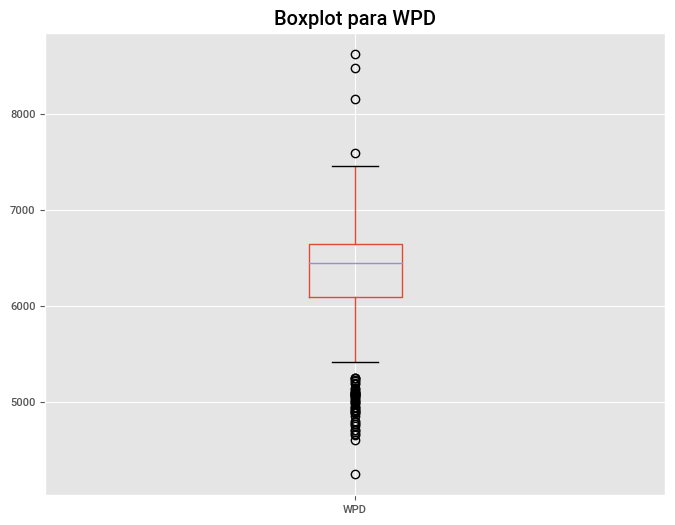


Análise de outliers para a coluna WPD:
 - Número de outliers: 55
 - Limite inferior: 5250.5
 - Limite superior: 7482.5
 - Valores outliers: [5146.0, 5132.0, 8150.0, 4885.0, 5089.0, 5083.0, 4600.0, 4770.0, 4688.0, 5000.0, 5126.0, 4900.0, 5060.0, 5226.0, 4948.0, 5071.0, 5006.0, 4946.0, 4912.0, 4750.0, 4983.0, 4700.0, 4660.0, 5249.0, 8620.0, 4800.0, 4243.0, 4700.0, 4971.0, 4912.0, 5191.0, 7595.0, 5215.0, 5027.0, 5185.0, 5095.0, 5050.0, 5250.0, 5066.0, 4770.0, 5250.0, 5064.0, 4888.0, 4850.0, 5087.0, 5097.0, 5042.0, 8478.0, 5007.0, 4882.0, 5096.0, 5071.0, 4790.0, 4650.0, 4933.0]


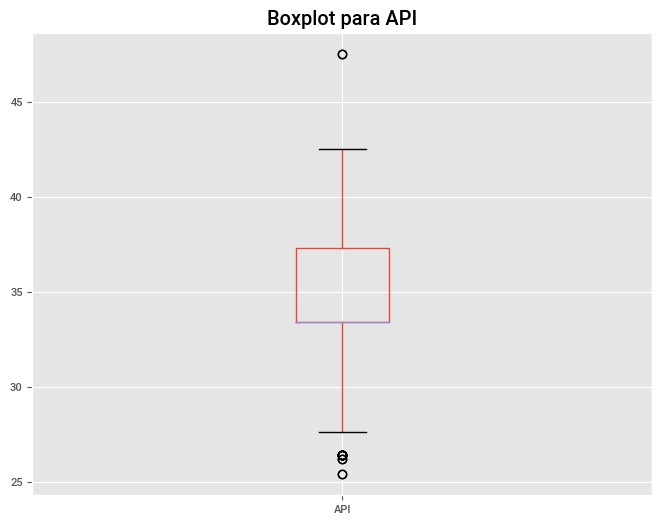


Análise de outliers para a coluna API:
 - Número de outliers: 20
 - Limite inferior: 27.55
 - Limite superior: 43.14999999999999
 - Valores outliers: [26.2, 25.4, 25.4, 26.4, 26.4, 26.4, 26.4, 26.4, 47.5, 26.4, 26.4, 26.4, 26.4, 26.4, 26.4, 26.4, 26.2, 47.5, 26.4, 26.4]


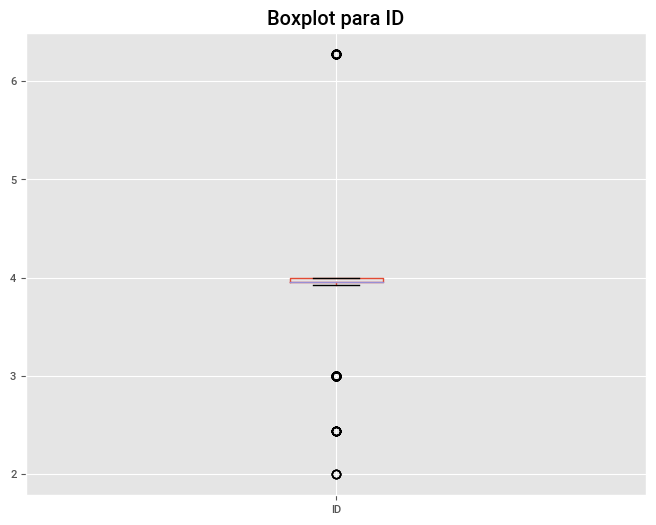


Análise de outliers para a coluna ID:
 - Número de outliers: 105
 - Limite inferior: 3.8950000000000005
 - Limite superior: 4.063
 - Valores outliers: [2.992, 2.992, 6.276, 2.992, 2.441, 2.441, 2.992, 6.276, 2.992, 2.992, 2.992, 2.992, 6.276, 1.995, 2.441, 2.441, 2.441, 2.992, 1.995, 2.992, 6.276, 6.276, 6.276, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 6.276, 6.276, 6.276, 2.992, 2.441, 2.992, 6.276, 2.992, 2.992, 6.276, 2.992, 2.992, 1.995, 2.441, 2.992, 2.441, 2.992, 1.995, 6.276, 6.276, 2.992, 2.992, 6.276, 6.276, 6.276, 2.441, 6.276, 2.992, 6.276, 6.276, 6.276, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 6.276, 2.441, 2.441, 2.992, 6.276, 2.992, 6.276, 2.992, 6.276, 2.992, 2.441, 2.992, 2.992, 2.992, 2.992, 6.276, 2.992, 2.992, 2.992, 2.441, 6.276, 2.992, 2.992, 2.992, 6.276, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 2.992, 6.276, 2.992, 6.276, 2.992]


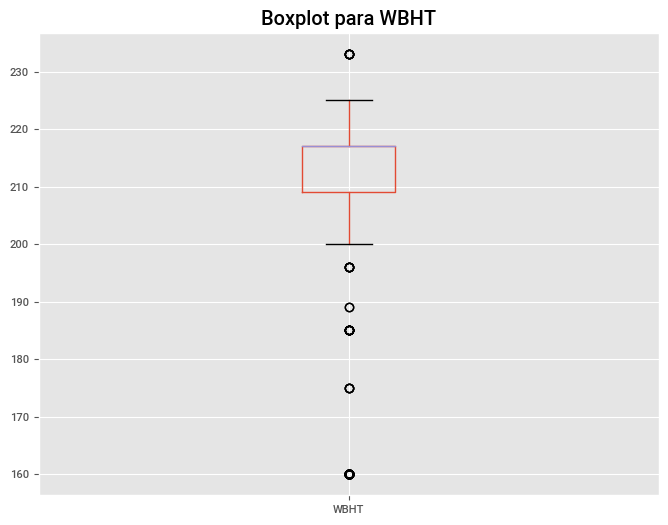


Análise de outliers para a coluna WBHT:
 - Número de outliers: 103
 - Limite inferior: 197.0
 - Limite superior: 229.0
 - Valores outliers: [160, 160, 160, 160, 160, 160, 175, 160, 160, 160, 160, 160, 160, 185, 160, 233, 160, 160, 160, 175, 185, 160, 160, 160, 160, 160, 160, 160, 233, 160, 160, 160, 185, 160, 185, 160, 196, 233, 160, 185, 160, 160, 160, 189, 160, 185, 196, 233, 185, 160, 196, 160, 160, 160, 160, 160, 160, 160, 233, 175, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 175, 196, 185, 160, 160, 160, 160, 160, 160, 160, 160, 160, 185, 160, 160, 196, 160, 160, 160, 189, 160, 233, 160, 160, 160, 233, 160, 160, 185, 185, 196]


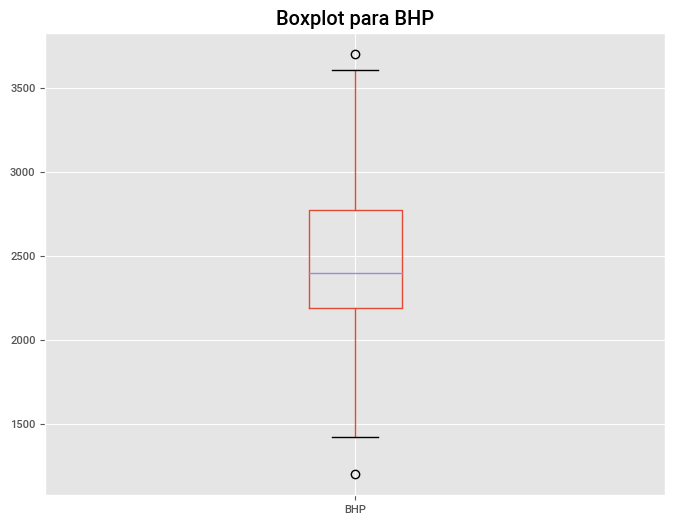


Análise de outliers para a coluna BHP:
 - Número de outliers: 2
 - Limite inferior: 1322.25
 - Limite superior: 3636.25
 - Valores outliers: [1198, 3698]


In [ ]:
import matplotlib.pyplot as plt

# Colunas numéricas para análise de outliers
numeric_columns = ['WHP', 'WFR', 'OFR', 'GFR', 'WPD', 'API', 'ID', 'WBHT', 'BHP']

# Identificação e visualização de outliers usando boxplot
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[column])
    plt.title(f'Boxplot para {column}')
    plt.show()

    # Calculando estatísticas resumidas para identificar potenciais outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f'\nAnálise de outliers para a coluna {column}:')
    print(f' - Número de outliers: {len(outliers)}')
    print(f' - Limite inferior: {lower_bound}')
    print(f' - Limite superior: {upper_bound}')
    print(f' - Valores outliers: {outliers[column].tolist()}')

##Escalonamento *

In [16]:
# Exibindo as primeiras linhas do DataFrame antes da do escalonamento
print(df.head())
df_esc = df.copy()

# Selecionando apenas os atributos para a padronização (excluindo 'SN' e 'FBHP')
atributos_para_padronizar = df_esc.columns.difference(['SN', 'BHP'])

# Criando o objeto StandardScaler
scaler = StandardScaler()

# Aplicando a padronização nos atributos selecionados
df_esc[atributos_para_padronizar] = scaler.fit_transform(df_esc[atributos_para_padronizar])

# Exibindo as primeiras linhas do DataFrame após escalonamento
print(df_esc.head())

   SN  WHP   WFR   OFR     GFR     WPD   API     ID  WBHT   BHP
0   1  670  3822  1848   248.0  6858.0  33.4  4.000   217  3234
1   2  600  2420   824  1078.0  6567.0  31.7  3.958   200  2649
2   3  340   140  5469  2620.0  6252.0  33.4  4.000   217  1851
3   4  280  2245  6455  3118.0  6164.0  33.4  3.958   217  1975
4   5  380  2758  3642  1344.0  6486.0  33.4  3.958   217  2383
   SN       WHP       WFR       OFR       GFR       WPD       API        ID  \
0   1  0.970820  0.700662 -0.960976 -1.034714  1.039255 -0.147584  0.080114   
1   2  0.694778  0.089331 -1.236260 -0.684343  0.469835 -0.694650  0.006217   
2   3 -0.330521 -0.904846  0.012467 -0.033412 -0.146547 -0.147584  0.080114   
3   4 -0.567129  0.013023  0.277536  0.176811 -0.318743 -0.147584  0.006217   
4   5 -0.172783  0.236713 -0.478690 -0.572055  0.311337 -0.147584  0.006217   

       WBHT   BHP  
0  0.369995  3234  
1 -0.561541  2649  
2  0.369995  1851  
3  0.369995  1975  
4  0.369995  2383  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [ ]:
# Estatísticas básicas sem escalonamento
summary_statistics = df.describe()

# Exibindo as estatísticas
print("Estatísticas básicas para cada coluna:")
print(summary_statistics)

Estatísticas básicas para cada coluna:
               SN          WHP           WFR           OFR           GFR  \
count  795.000000   795.000000    795.000000    795.000000    795.000000   
mean   398.000000   423.815094   2215.133333   5422.625157   2699.149686   
std    229.641024   253.744054   2294.799184   3722.129271   2370.406663   
min      1.000000    92.000000      0.000000    176.000000      9.000000   
25%    199.500000   240.000000    343.500000   2497.000000    851.500000   
50%    398.000000   320.000000   1500.000000   4608.000000   2128.000000   
75%    596.500000   540.000000   3382.000000   7407.500000   3766.000000   
max    795.000000  1550.000000  11395.000000  17663.000000  17859.000000   

               WPD         API          ID        WBHT          BHP  
count   795.000000  795.000000  795.000000  795.000000   795.000000  
mean   6326.892314   33.858616    3.954467  210.247799  2469.730818  
std     511.368115    3.109445    0.568717   18.260920   387.22602

In [ ]:
# Estatísticas básicas escalonada
summary_statistics = df_esc.describe()

# Exibindo as estatísticas
print("Estatísticas básicas para cada coluna:")
print(summary_statistics)

Estatísticas básicas para cada coluna:
               SN           WHP           WFR           OFR           GFR  \
count  795.000000  7.950000e+02  7.950000e+02  7.950000e+02  7.950000e+02   
mean   398.000000 -1.340647e-17  4.915704e-17 -6.926674e-17 -3.798499e-17   
std    229.641024  1.000630e+00  1.000630e+00  1.000630e+00  1.000630e+00   
min      1.000000 -1.308500e+00 -9.658918e-01 -1.410464e+00 -1.135604e+00   
25%    199.500000 -7.248675e-01 -8.161113e-01 -7.865033e-01 -7.799560e-01   
50%    398.000000 -4.093907e-01 -3.118284e-01 -2.189978e-01 -2.411018e-01   
75%    596.500000  4.581705e-01  5.088032e-01  5.335990e-01  4.503539e-01   
max    795.000000  4.441065e+00  4.002810e+00  3.290611e+00  6.399490e+00   

                WPD           API            ID          WBHT          BHP  
count  7.950000e+02  7.950000e+02  7.950000e+02  7.950000e+02   795.000000  
mean   1.243450e-15  1.282552e-15 -1.273614e-16 -4.066628e-16  2469.730818  
std    1.000630e+00  1.000630e+00  1

#**5. Separando treino e teste ***

In [17]:
# Excluindo o atributo 'BHP'
X = df_esc.drop('BHP', axis=1)
#X = df.drop('BHP', axis=1)

# Atribuindo o atributo 'FBHP' como a variável alvo
y = df_esc['BHP']
#y = df['BHP']

# Dividindo a base de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo as primeiras linhas dos conjuntos de treinamento e teste
print("Conjunto de Treinamento:")
print(X_train.head())
print("\nConjunto de Teste:")
print(X_test.head())

# Exibindo as primeiras linhas das variáveis alvo dos conjuntos de treinamento e teste
print("\nVariável Alvo do Conjunto de Treinamento:")
print(y_train.head())
print("\nVariável Alvo do Conjunto de Teste:")
print(y_test.head())

Conjunto de Treinamento:
      SN       WHP       WFR       OFR       GFR       WPD       API  \
525  526 -0.093914 -0.965892 -0.320616 -0.930447 -2.498584 -2.400207   
552  553 -0.685433 -0.457030 -0.956405 -0.854463 -0.674875 -0.147584   
436  437 -0.567129 -0.944962  1.102045  0.050593  0.025649 -0.919912   
744  745 -0.448825  1.306761  0.799609  0.930743  0.767264  1.107448   
425  426  2.272162 -0.881300 -0.349919 -0.954931 -0.381359 -0.147584   

           ID      WBHT  
525  0.080114 -2.753390  
552  0.080114  0.369995  
436  0.080114  0.808365  
744  0.006217  0.808365  
425  0.080114  0.369995  

Conjunto de Teste:
      SN       WHP       WFR       OFR       GFR       WPD       API  \
691  692 -0.882606  0.978857 -0.538640 -0.404468  0.747697 -0.694650   
662  663 -0.665716 -0.138720 -1.026840 -0.909340  0.011951 -0.147584   
63    64  0.300432 -0.362409 -0.716069 -0.564034  0.211542 -0.147584   
531  532 -0.685433  1.567514 -0.200179  0.003736  0.252634  1.107448   
66    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Comparando conjunto de treino e teste
df_sweetviz = sv.compare(
                 [X_train, "Training Data"],
                 [X_test , "Test Data"],
                 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



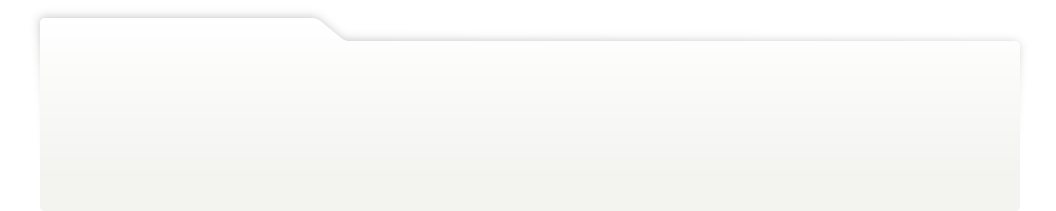
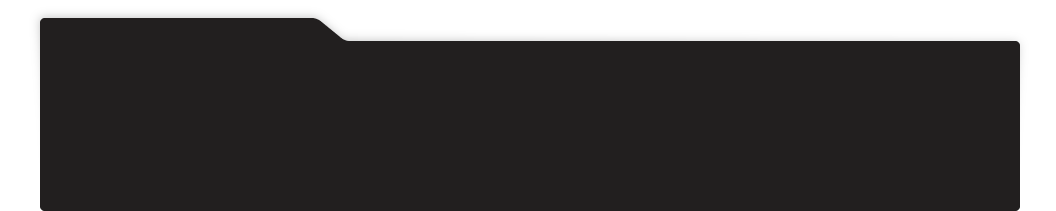
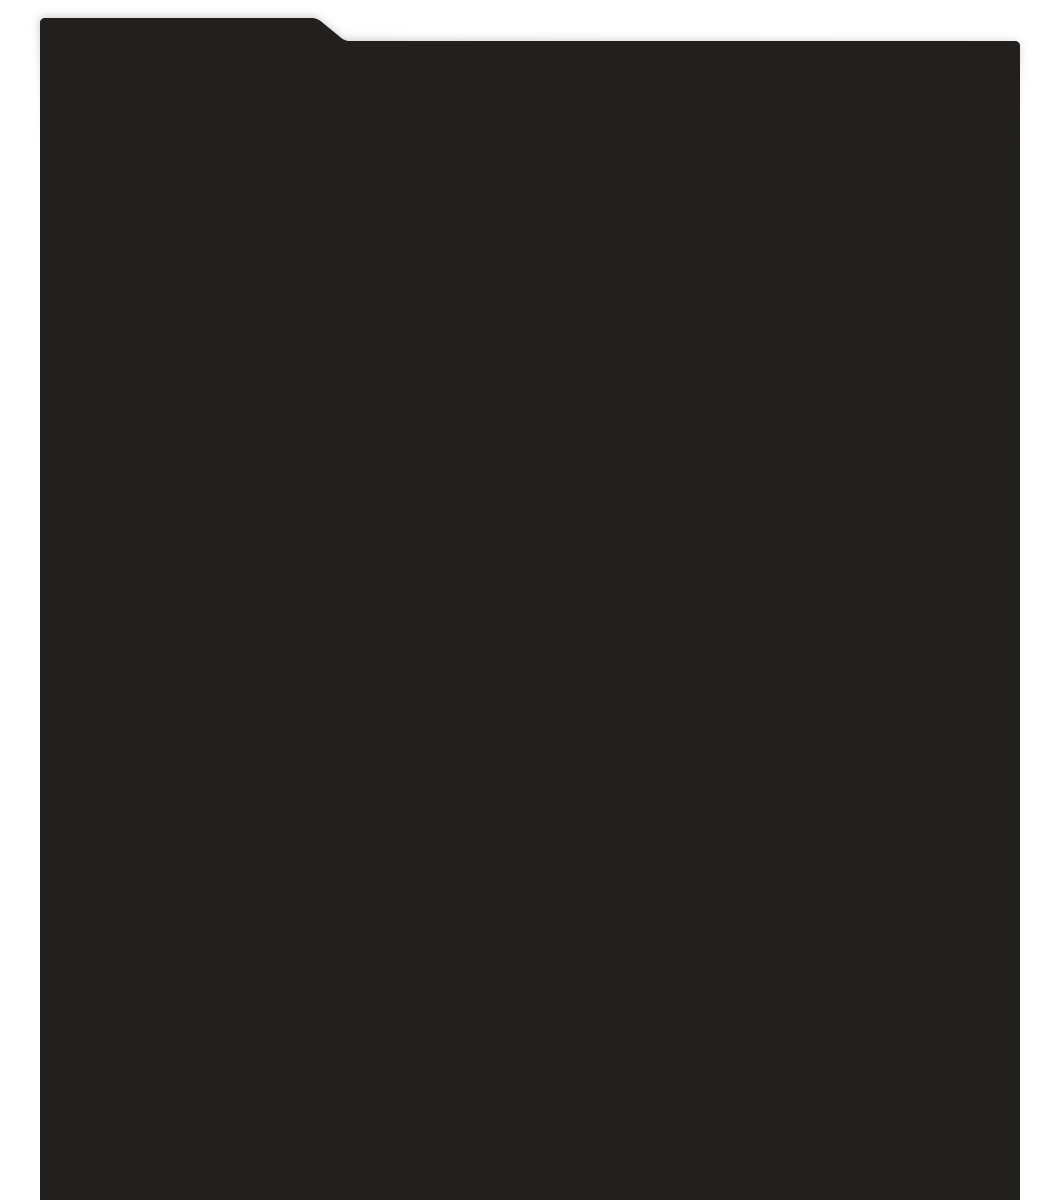
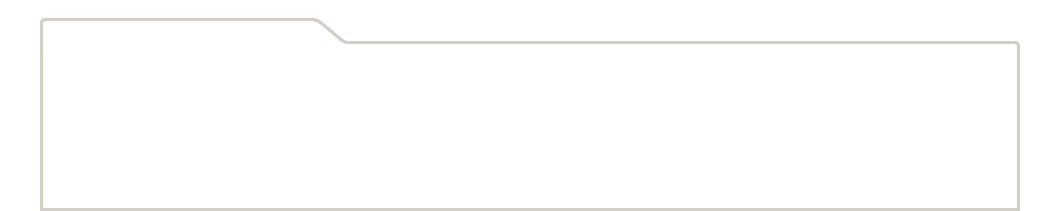
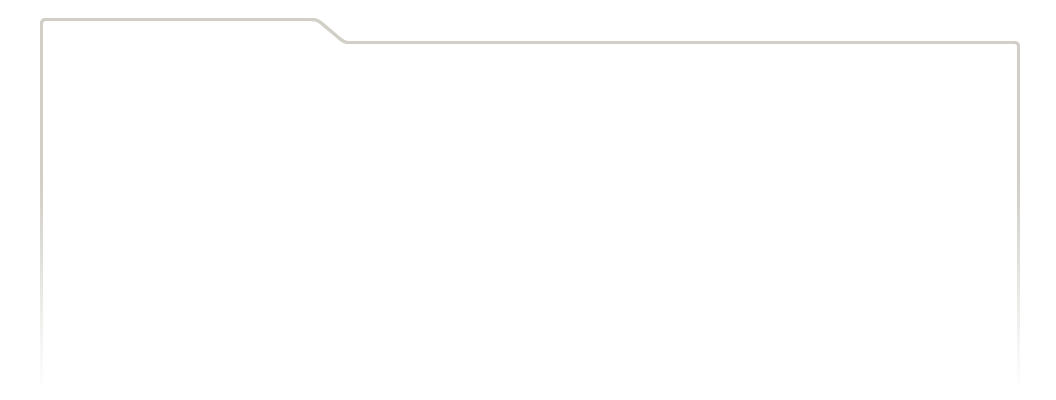
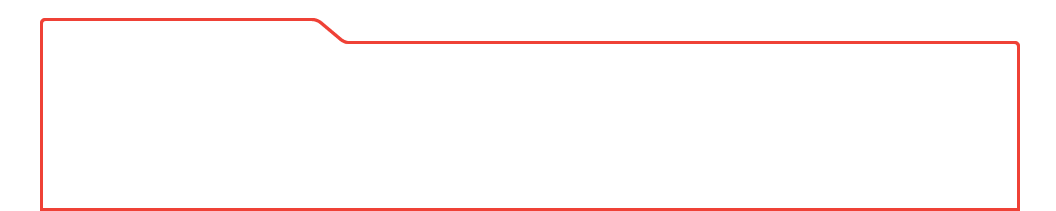
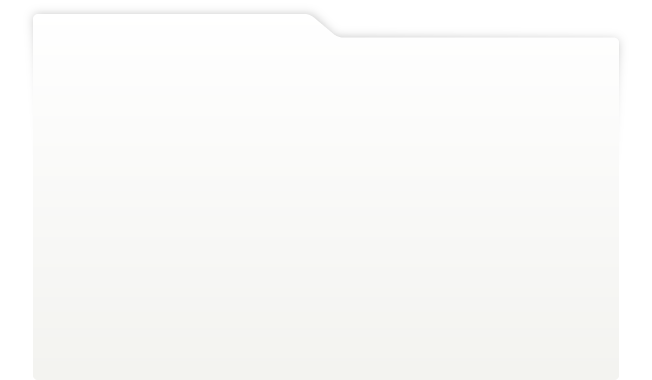
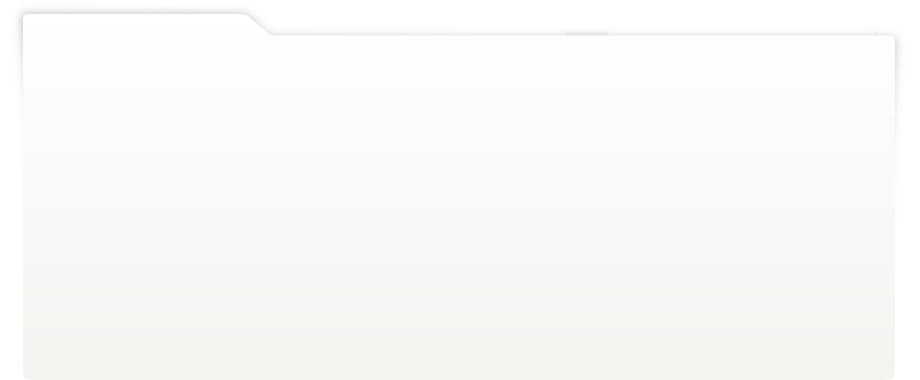
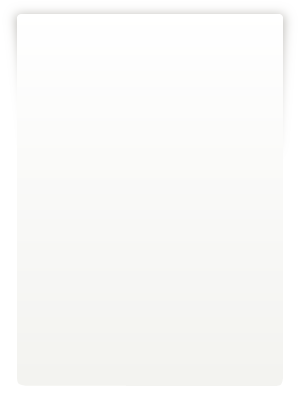
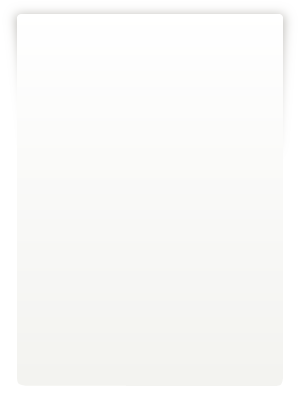
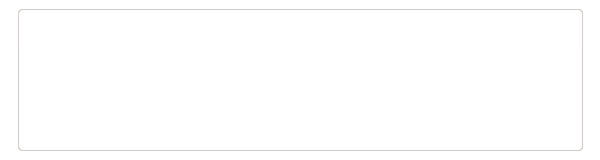
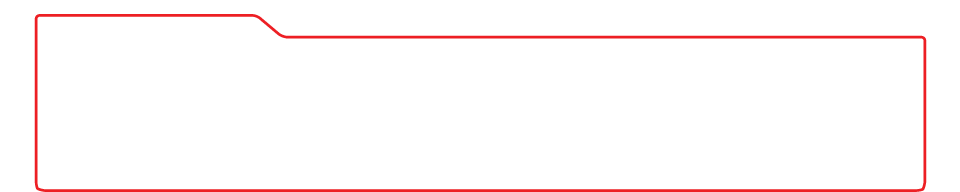
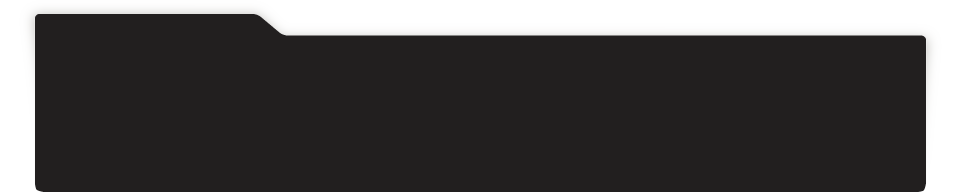
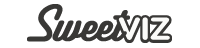
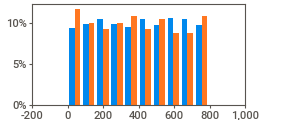
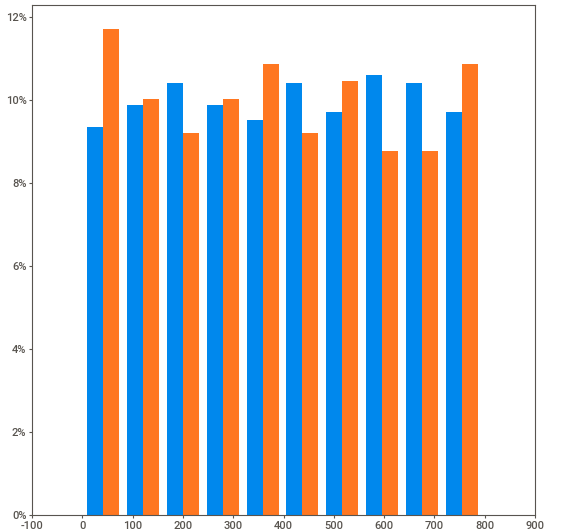
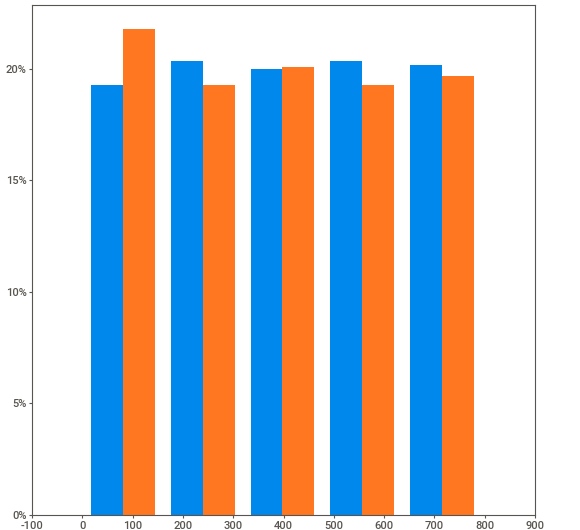
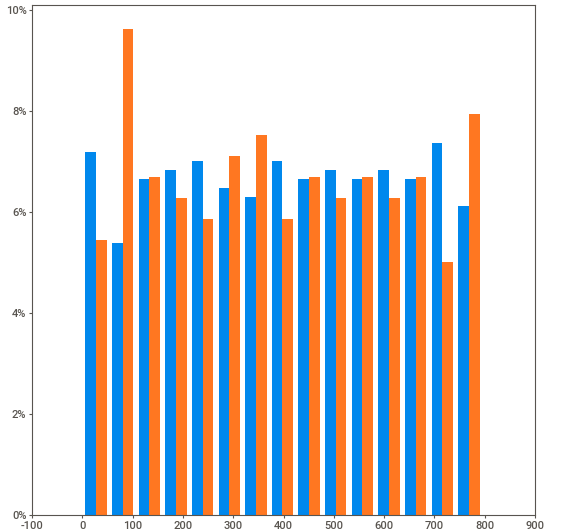
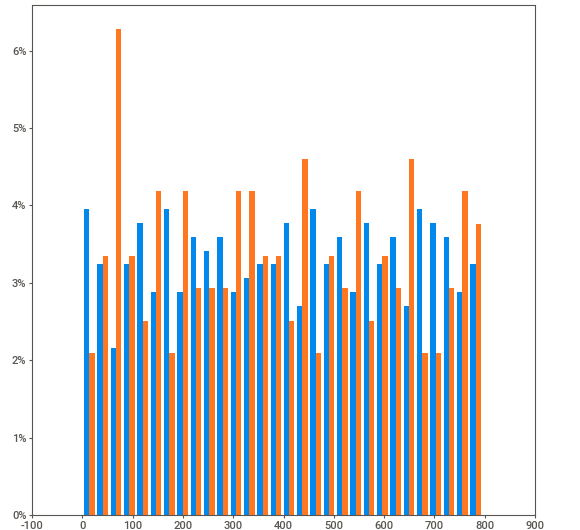
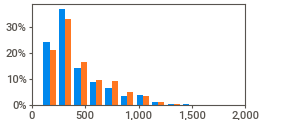
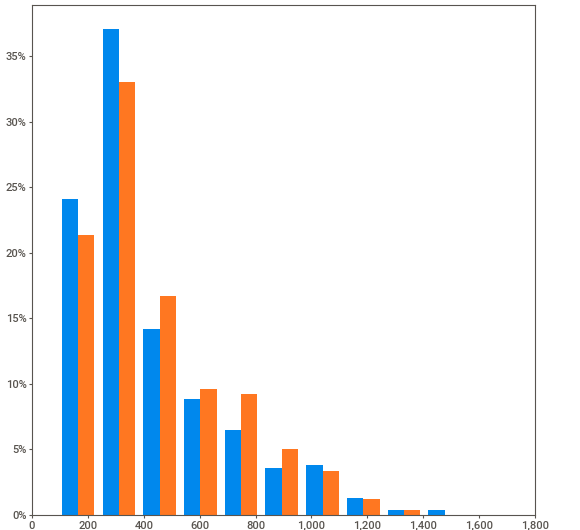
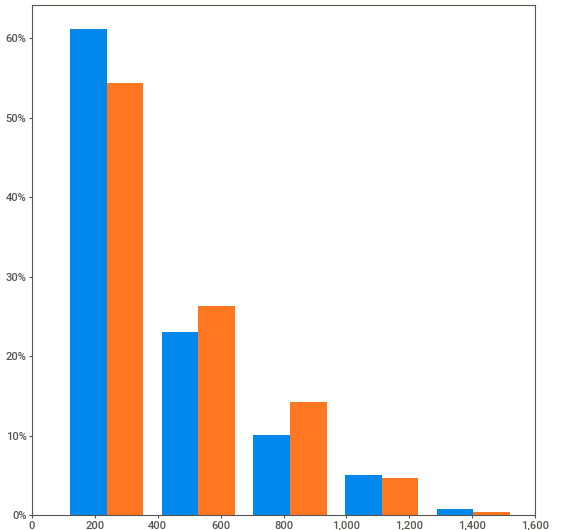
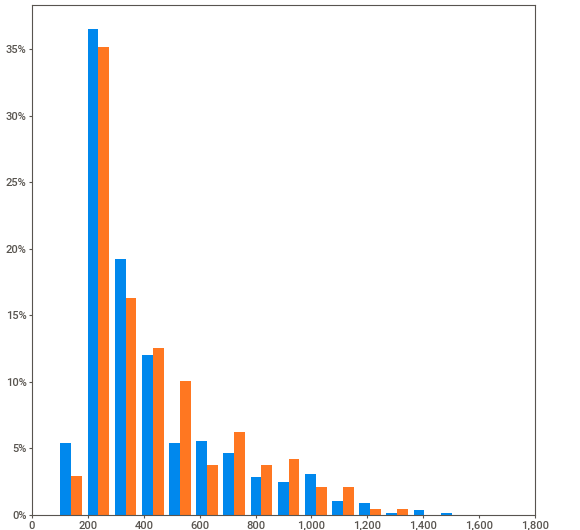
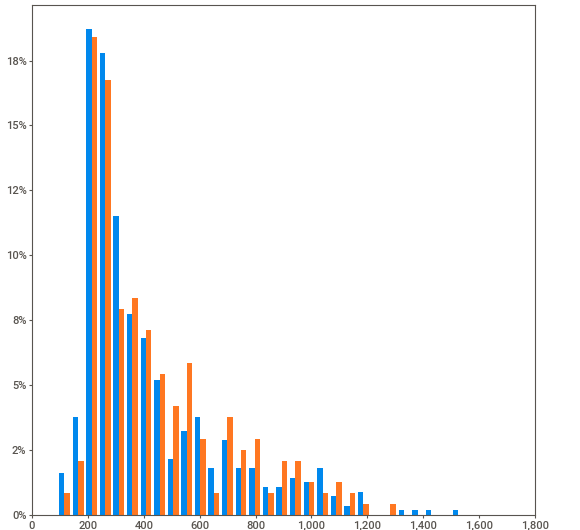
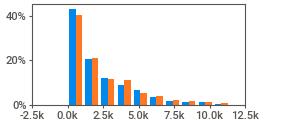
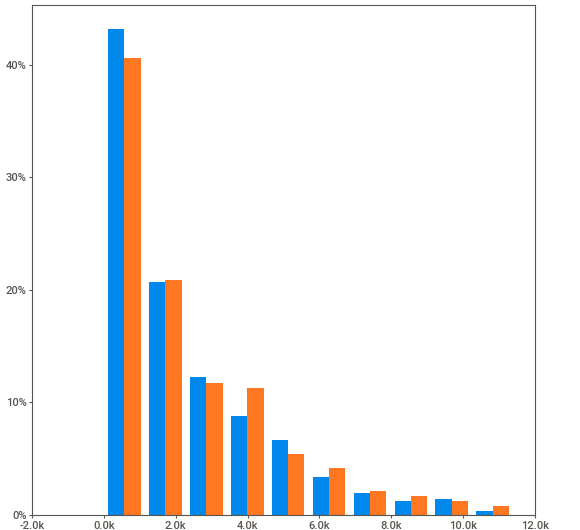
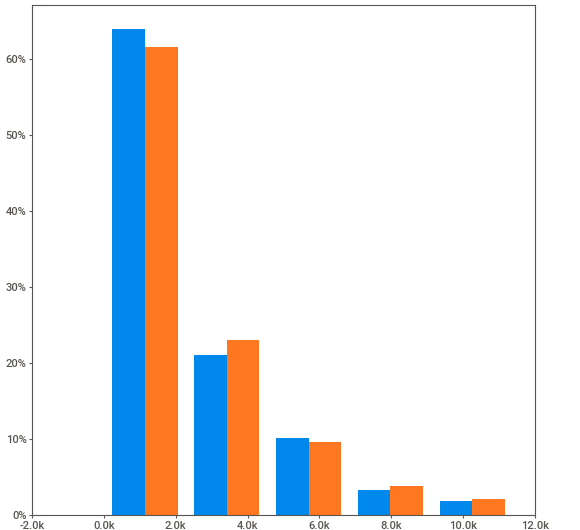
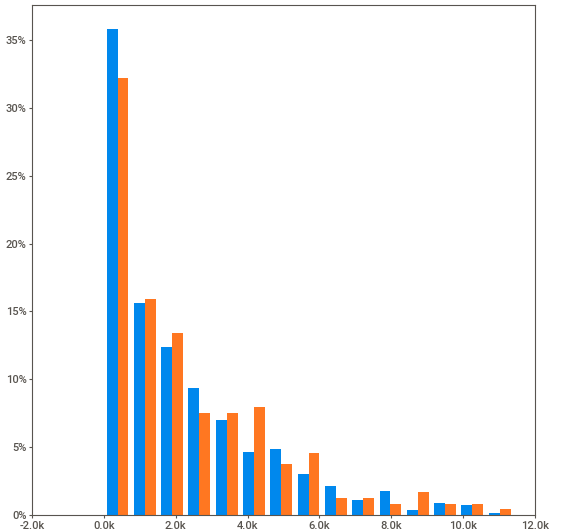
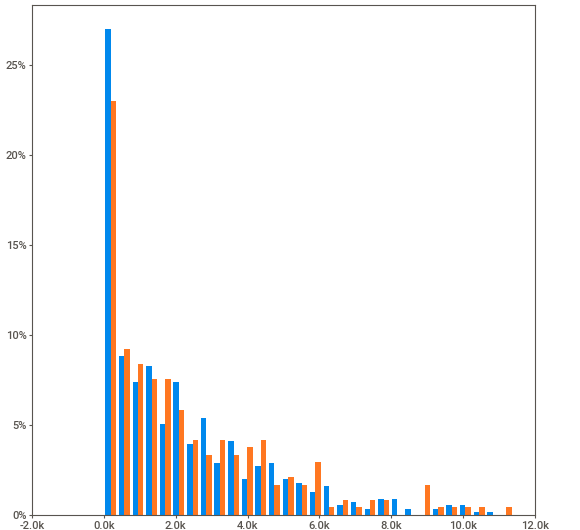
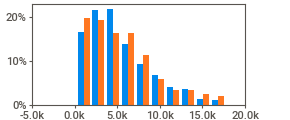
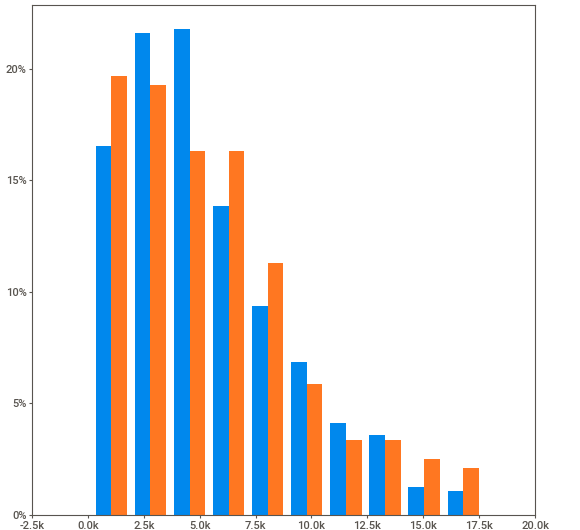
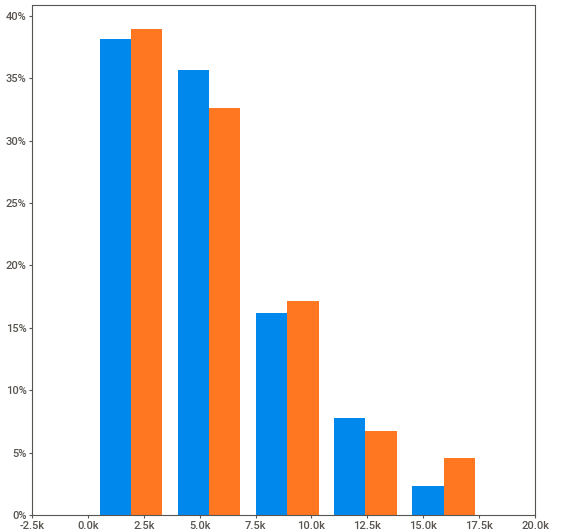
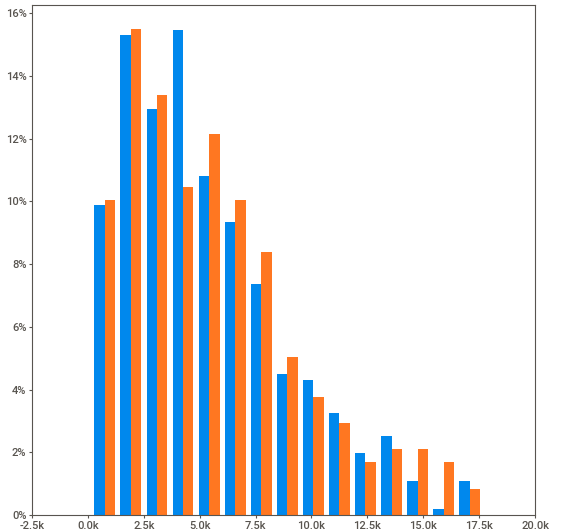
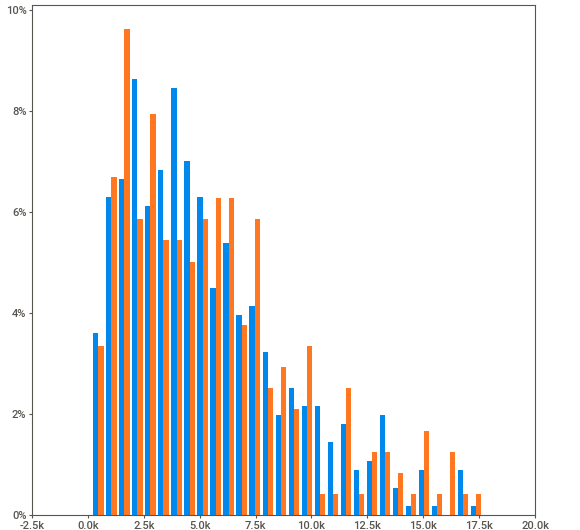
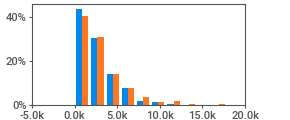
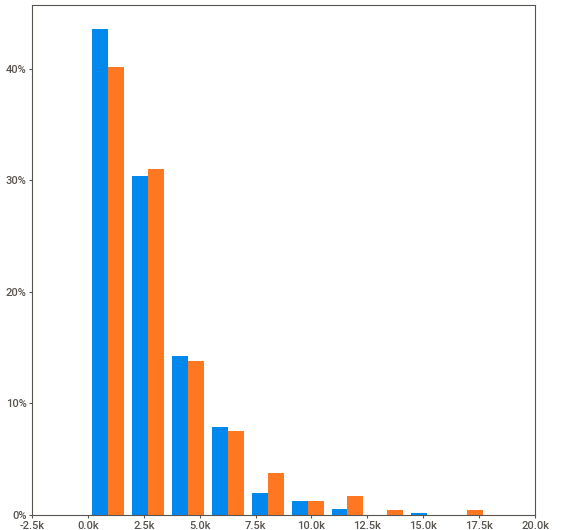
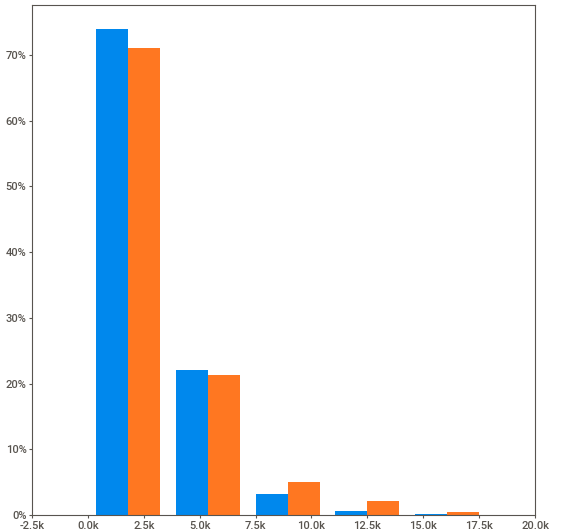
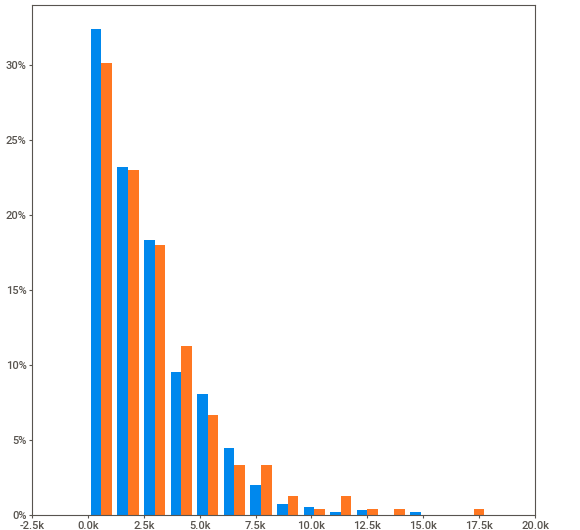
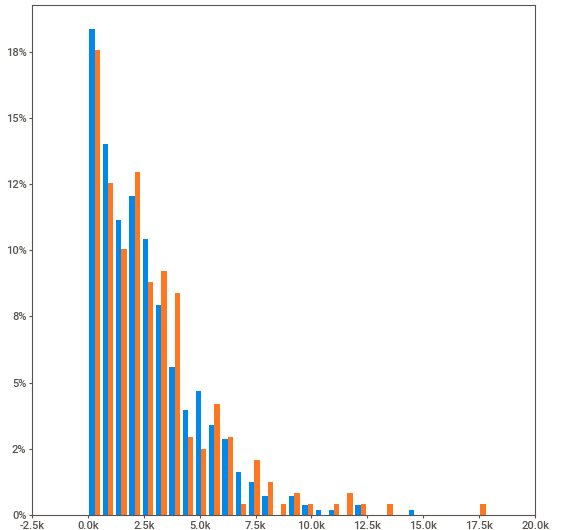
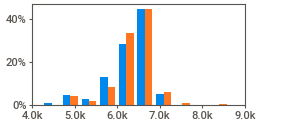
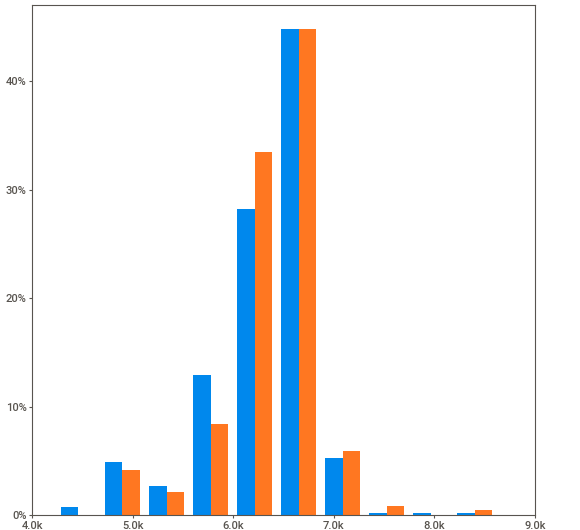
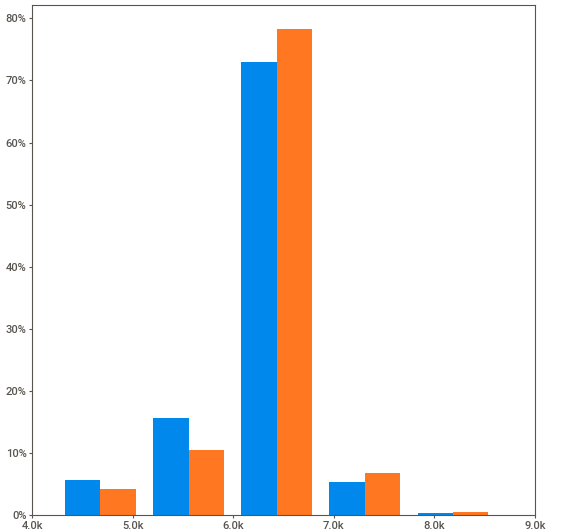
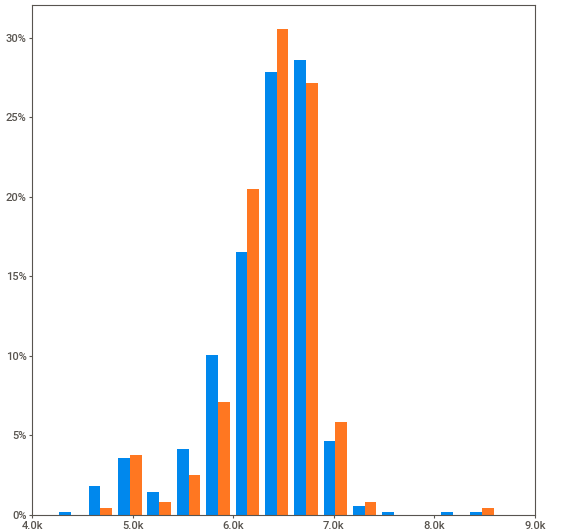
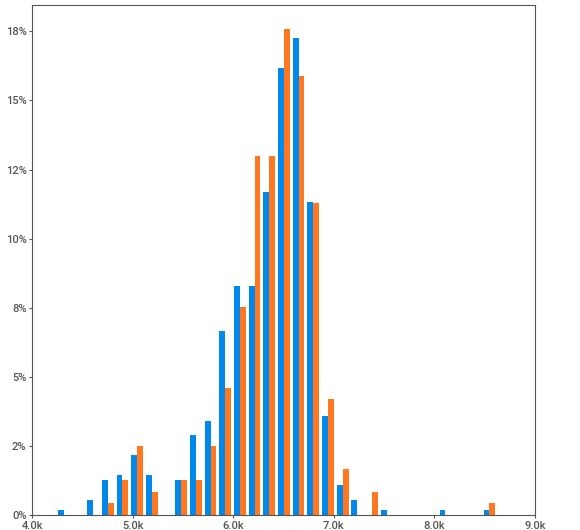
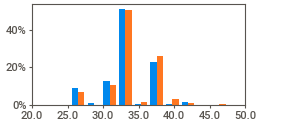
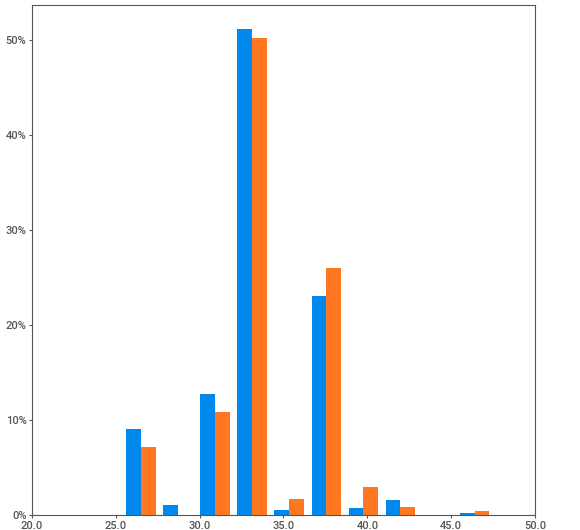
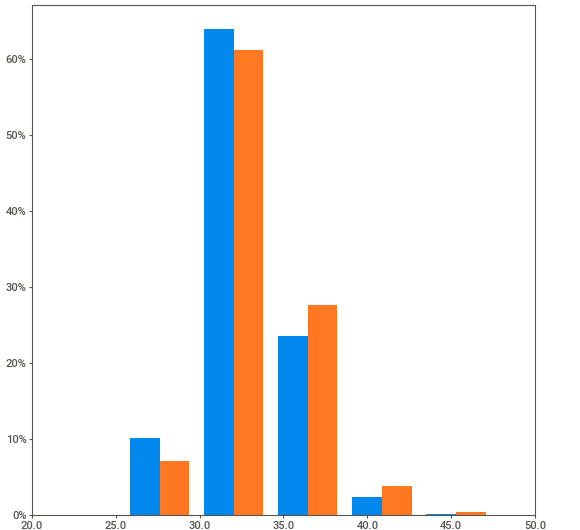
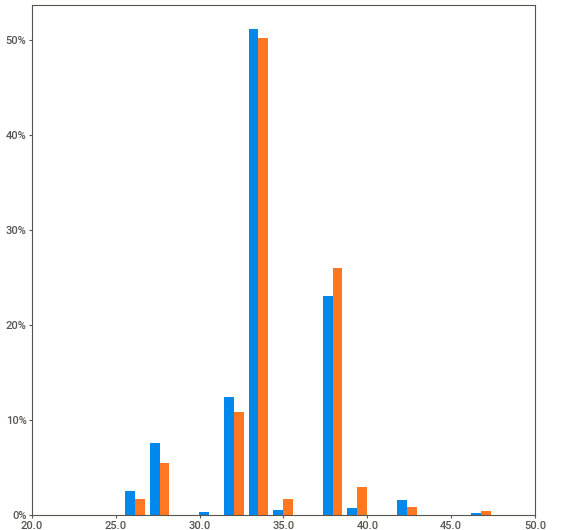
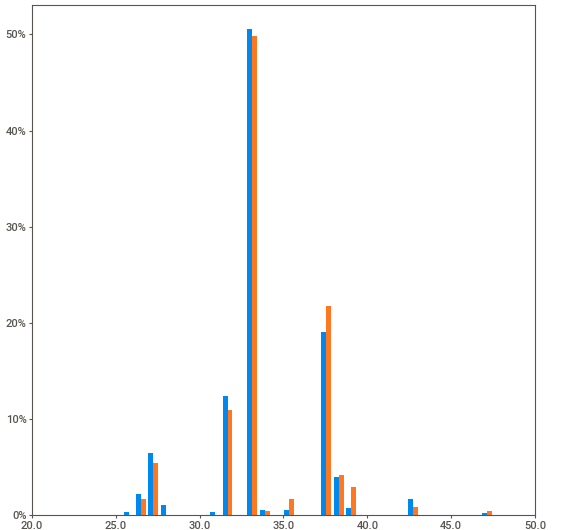
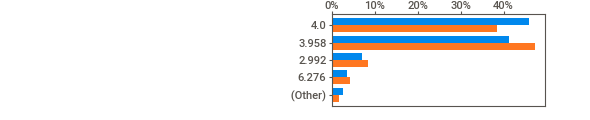
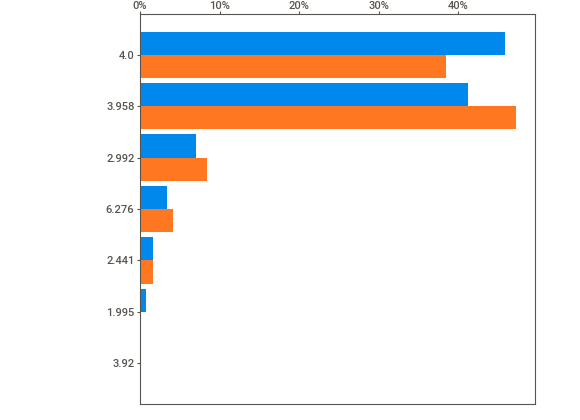
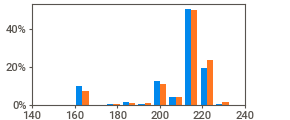
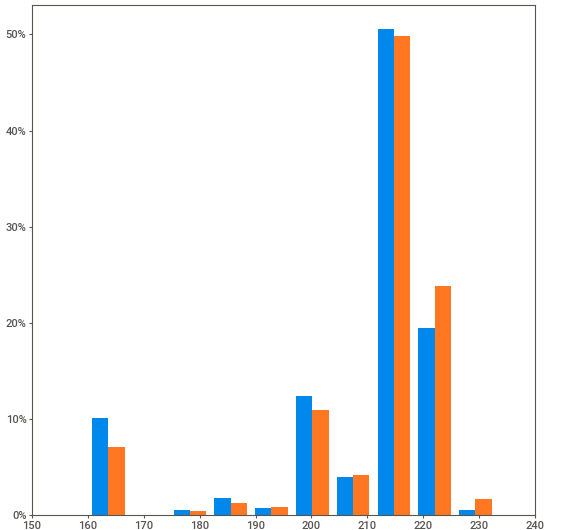
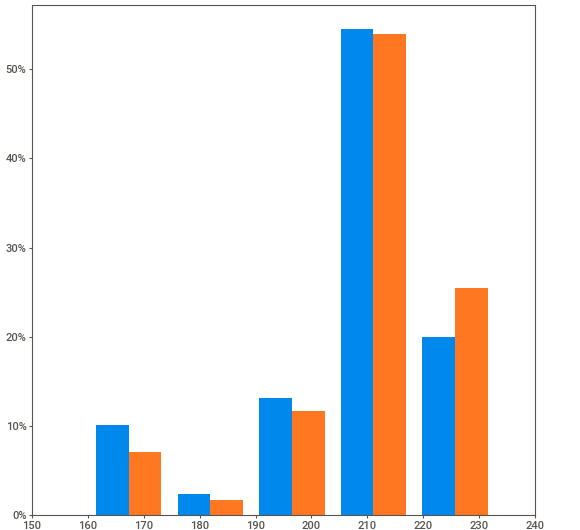
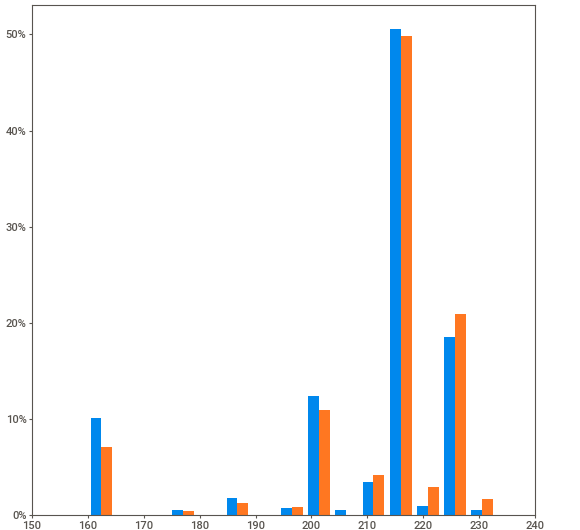
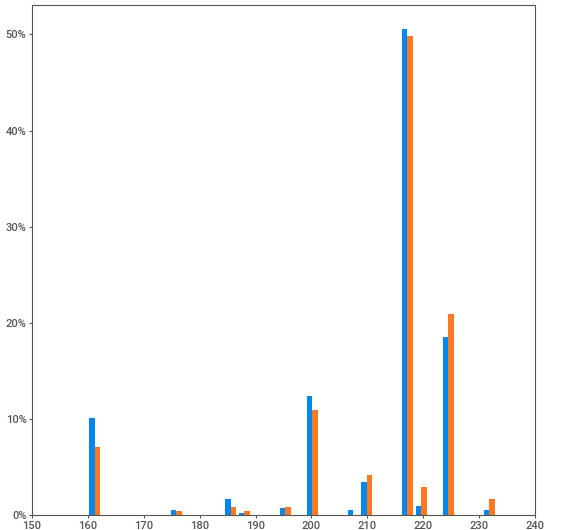
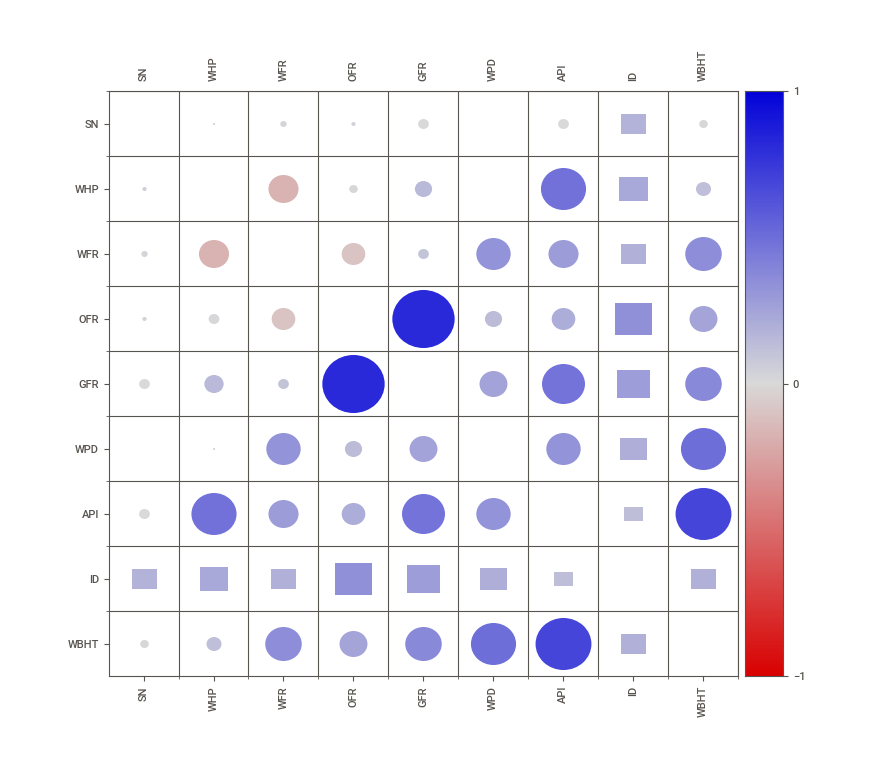
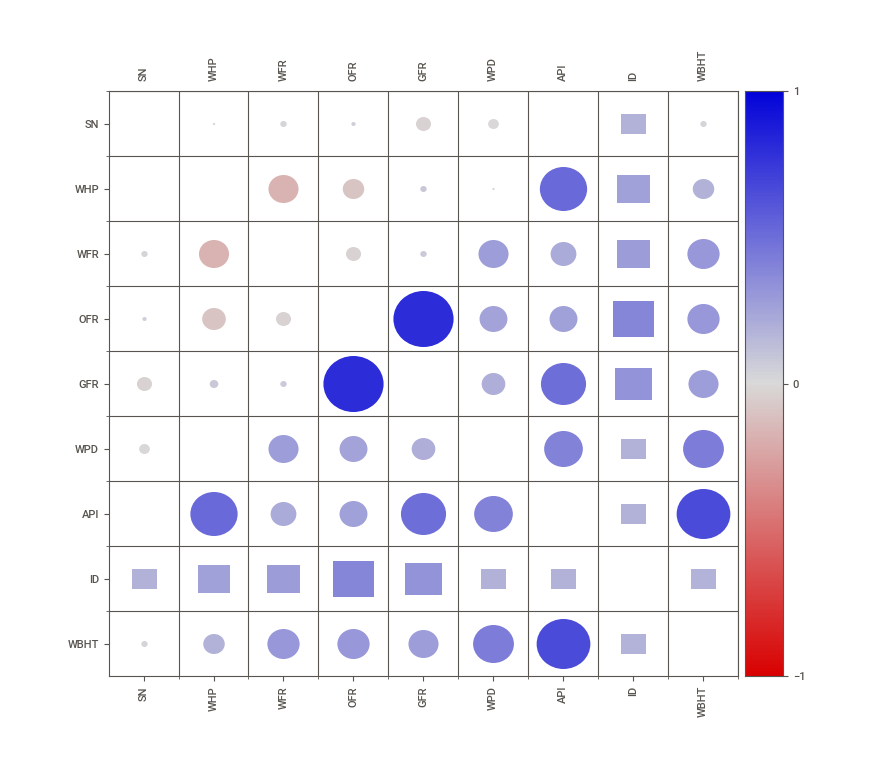

In [ ]:
#Exibindo comparação de treino e teste
df_sweetviz.show_notebook()

#**6. GMDH**

In [18]:
x_train, x_test, y_train, y_test = split_data(X, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# print result arrays
print('x_train:\n', x_train)
print('x_test:\n', x_test)
print('\ny_train:\n', y_train)
print('y_test:\n', y_test)

In [ ]:
#model = Combi()
#model = Multi()
#model = Mia()
model = Ria()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

# compare predicted and real value
print('y_predicted: ', y_predicted)
print('y_test: ', y_test)

In [30]:
#RASCUNHO *************************************
def fit_predict_mede_salva(modelo):
    #-----Fit/predict -------
    modelo.fit(x_train, y_train)
    y_predicted = modelo.predict(x_test)

    #-----Funções ----------
    def rmse(y_true, y_pred):
      return np.sqrt(mean_squared_error(y_true, y_pred))

    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    #-----Métricas ----------
    # Coeficiente de Determinação (R^2)
    r2 = r2_score(y_test, y_predicted)

    # Coeficiente de Pearson (R)
    pearson_corr, _ = pearsonr(y_test, y_predicted)

    # Erro Quadrático Médio (MSE)
    mse = mean_squared_error(y_test, y_predicted)

    # Erro Quadrático Médio Relativo (RMSE)
    root_mse = np.sqrt(mse)

    # Erro Percentual Médio Absoluto (MAPE)
    mape_val = mape(y_test, y_predicted)

    print("Modelo: ",modelo)
    print("Coeficiente de Determinação (R^2):", r2)
    print("Coeficiente de Pearson (R):", pearson_corr)
    print("Erro Quadrático Médio (MSE):", mse)
    print("Erro Quadrático Médio Relativo (RMSE):", root_mse)
    print("Erro Percentual Médio Absoluto (MAPE):", mape_val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# RASCUNHO ***********************************
fit_predict_mede_salva(Ria())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Modelo:  <gmdh.gmdh.Ria object at 0x7c6db70c79a0>
Coeficiente de Determinação (R^2): 0.82651093225657
Coeficiente de Pearson (R): 0.9274864926121967
Erro Quadrático Médio (MSE): 26629.893972979684
Erro Quadrático Médio Relativo (RMSE): 163.1866844230242
Erro Percentual Médio Absoluto (MAPE): 5.834186114854697


#**7. Métricas**

In [61]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Coeficiente de Determinação (R^2)
r2 = r2_score(y_test, y_predicted)

# Coeficiente de Pearson (R)
pearson_corr, _ = pearsonr(y_test, y_predicted)

# Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_predicted)

# Erro Quadrático Médio Relativo (RMSE)
root_mse = np.sqrt(mse)

# Erro Percentual Médio Absoluto (MAPE)
mape_val = mape(y_test, y_predicted)

print("Coeficiente de Determinacao (R^2):", r2)
print("Coeficiente de Pearson (R):", pearson_corr)
print("Erro Quadratico Medio (MSE):", mse)
print("Erro Quadratico Medio Relativo (RMSE):", root_mse)
print("Erro Percentual Medio Absoluto (MAPE):", mape_val)

Coeficiente de Determinacao (R^2): 0.82651093225657
Coeficiente de Pearson (R): 0.9274864926121967
Erro Quadratico Medio (MSE): 26629.893972979684
Erro Quadratico Medio Relativo (RMSE): 163.1866844230242
Erro Percentual Medio Absoluto (MAPE): 5.834186114854697


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
# Gravando JSON
metrics = {
    "Modelo: ": "RIA",
    "Coeficiente de Determinacao (R^2)": r2,
    "Coeficiente de Pearson (R)": pearson_corr,
    "Erro Quadratico Medio (MSE)": mse,
    "Erro Quadratico Medio Relativo (RMSE)": root_mse,
    "Erro Percentual Medio Absoluto (MAPE)": mape_val
}

# Nome do arquivo JSON
json_file = "metricas_gmdh_RIA.json"

# Salvar métricas em um arquivo JSON
with open(json_file, "w") as f:
    json.dump(metrics, f, indent=4)

print("As métricas foram salvas em:", json_file)


As métricas foram salvas em: metricas_gmdh_RIA.json


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# RASCUNHO ***************************************************
# Nome do arquivo JSON
json_file = "metricas_gmdh.json"

# Verificar se o arquivo JSON já existe
if os.path.exists(json_file):
    # Carregar métricas do arquivo JSON existente
    with open(json_file, "r") as f:
        existing_metrics = json.load(f)
else:
    existing_metrics = {}

# Adicionar novas métricas ao dicionário existente
existing_metrics["Modelo: "] = "MULTI"
existing_metrics["Coeficiente de Determinacao (R^2)"] = r2
existing_metrics["Coeficiente de Pearson (R)"] = pearson_corr
existing_metrics["Erro Quadratico Medio (MSE)"] = mse
existing_metrics["Erro Quadratico Medio Relativo (RMSE)"] = root_mse
existing_metrics["Erro Percentual Medio Absoluto (MAPE)"] = mape_val

# Salvar métricas atualizadas em um arquivo JSON
with open(json_file, "w") as f:
    json.dump(existing_metrics, f, indent=4)

print("As métricas foram adicionadas ao arquivo:", json_file)


As métricas foram adicionadas ao arquivo: metricas_gmdh.json


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# RASCUNHO ***************************************************
# Lendo JSON
json_file = "metricas_gmdh.json"

# Abrir e ler o arquivo JSON
with open(json_file, "r") as f:
    metricas = json.load(f)

# Exibir as métricas lidas do arquivo JSON
print("Métricas lidas do arquivo", json_file, ":\n", metricas)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Métricas lidas do arquivo metricas_gmdh.json :
 {'COMBI': {'Coeficiente de Determinacao (R^2)': 0.6370373346277158, 'Coeficiente de Pearson (R)': 0.8493986333141482, 'Erro Quadratico Medio (MSE)': 55713.35082224553, 'Erro Quadratico Medio Relativo (RMSE)': 236.03675735411534, 'Erro Percentual Medio Absoluto (MAPE)': 8.841795232493256}, 'MULTI': {'Coeficiente de Determinacao (R^2)': 0.6370373346277158, 'Coeficiente de Pearson (R)': 0.8493986333141482, 'Erro Quadratico Medio (MSE)': 55713.35082224553, 'Erro Quadratico Medio Relativo (RMSE)': 236.03675735411534, 'Erro Percentual Medio Absoluto (MAPE)': 8.841795232493256}, 'MIA': {'Coeficiente de Determinacao (R^2)': -4.743915970678544, 'Coeficiente de Pearson (R)': 0.48765885636744805, 'Erro Quadratico Medio (MSE)': 881668.6565811979, 'Erro Quadratico Medio Relativo (RMSE)': 938.9721276913377, 'Erro Percentual Medio Absoluto (MAPE)': 10.244377043099579}, 'RIA': {'Coeficiente de Determinacao (R^2)': 0.82651093225657, 'Coeficiente de Pearso

In [66]:
# Lendo JSON
json_file = "metricas_gmdh.json"

# Abrir e ler o arquivo JSON
with open(json_file, "r") as f:
    metricas = json.load(f)

# Criar DataFrame a partir das métricas
df = pd.DataFrame(metricas)

# Exibir DataFrame
print("Métricas:")
print(df)


Métricas:
                                              COMBI         MULTI  \
Coeficiente de Determinacao (R^2)          0.637037      0.637037   
Coeficiente de Pearson (R)                 0.849399      0.849399   
Erro Quadratico Medio (MSE)            55713.350822  55713.350822   
Erro Quadratico Medio Relativo (RMSE)    236.036757    236.036757   
Erro Percentual Medio Absoluto (MAPE)      8.841795      8.841795   

                                                 MIA           RIA  
Coeficiente de Determinacao (R^2)          -4.743916      0.826511  
Coeficiente de Pearson (R)                  0.487659      0.927486  
Erro Quadratico Medio (MSE)            881668.656581  26629.893973  
Erro Quadratico Medio Relativo (RMSE)     938.972128    163.186684  
Erro Percentual Medio Absoluto (MAPE)      10.244377      5.834186  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Exibir DataFrame em forma de tabela HTML
html_table = df.to_html()

# Exibir a tabela HTML
print(html_table)


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>COMBI</th>
      <th>MULTI</th>
      <th>MIA</th>
      <th>RIA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Coeficiente de Determinacao (R^2)</th>
      <td>0.637037</td>
      <td>0.637037</td>
      <td>-4.743916</td>
      <td>0.826511</td>
    </tr>
    <tr>
      <th>Coeficiente de Pearson (R)</th>
      <td>0.849399</td>
      <td>0.849399</td>
      <td>0.487659</td>
      <td>0.927486</td>
    </tr>
    <tr>
      <th>Erro Quadratico Medio (MSE)</th>
      <td>55713.350822</td>
      <td>55713.350822</td>
      <td>881668.656581</td>
      <td>26629.893973</td>
    </tr>
    <tr>
      <th>Erro Quadratico Medio Relativo (RMSE)</th>
      <td>236.036757</td>
      <td>236.036757</td>
      <td>938.972128</td>
      <td>163.186684</td>
    </tr>
    <tr>
      <th>Erro Percentual Medio Absoluto (MAPE)</th>
      <td>8.841795</td>
      <td>8.841795</td>
      <

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>COMBI</th>
      <th>MULTI</th>
      <th>MIA</th>
      <th>RIA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Coeficiente de Determinacao (R^2)</th>
      <td>0.637037</td>
      <td>0.637037</td>
      <td>-4.743916</td>
      <td>0.826511</td>
    </tr>
    <tr>
      <th>Coeficiente de Pearson (R)</th>
      <td>0.849399</td>
      <td>0.849399</td>
      <td>0.487659</td>
      <td>0.927486</td>
    </tr>
    <tr>
      <th>Erro Quadratico Medio (MSE)</th>
      <td>55713.350822</td>
      <td>55713.350822</td>
      <td>881668.656581</td>
      <td>26629.893973</td>
    </tr>
    <tr>
      <th>Erro Quadratico Medio Relativo (RMSE)</th>
      <td>236.036757</td>
      <td>236.036757</td>
      <td>938.972128</td>
      <td>163.186684</td>
    </tr>
    <tr>
      <th>Erro Percentual Medio Absoluto (MAPE)</th>
      <td>8.841795</td>
      <td>8.841795</td>
      <td>10.244377</td>
      <td>5.834186</td>
    </tr>
  </tbody>
</table>

In [ ]:
model.get_best_polynomial()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'f1 = 240.8531*x2 + 177.0585*x6 + 21.1086*x2*x6 - 30.85*x2^2 - 0.8812*x6^2 + 2532.8779\nf2 = - 161.6911*x3 - 0.1113*f1 + 0.1275*x3*f1 - 9.8957*x3^2 + 0.0002*f1^2 + 1360.3538\nf3 = - 252.972*x4 + 1.8208*f2 + 0.0501*x4*f2 + 79.3528*x4^2 - 0.0002*f2^2 - 1115.3939\nf4 = - 128.6796*x9 + 1.2128*f3 + 0.1091*x9*f3 + 64.2195*x9^2 - 3.71548e-05*f3^2 - 380.8841\nf5 = 12.9296*x2 + 1.9655*f4 + 0.0075*x2*f4 + 10.9797*x2^2 - 0.0002*f4^2 - 1138.1571\nf6 = - 2.1207*x8 + 0.2419*f5 - 0.0242*x8*f5 + 2.8691*x8^2 + 0.0002*f5^2 + 914.1745\nf7 = 250.6748*x4 + 1.5555*f6 - 0.0908*x4*f6 - 3.1787*x4^2 - 0.0001*f6^2 - 712.8545\nf8 = - 189.0512*x6 + 1.3683*f7 + 0.0585*x6*f7 - 15.8107*x6^2 - 6.20209e-05*f7^2 - 522.2872\nf9 = 49.6625*x4 + 1.0231*f8 - 0.0146*x4*f8 - 3.5565*x4^2 - 3.00322e-06*f8^2 - 35.8111\nf10 = - 20.7873*x6 + 1.0695*f9 + 0.0067*x6*f9 - 0.0745*x6^2 - 1.2547e-05*f9^2 - 94.9274\nf11 = - 29.2795*x8 + 0.957*f10 + 0.0109*x8*f10 + 1.6065*x8^2 + 8.15155e-06*f10^2 + 54.4136\nf12 = 22.4171*x4 + 1.0407*f11 - 0